In [1]:
import ROOT
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++   -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.24/06


In [2]:
def plot_confusion_matrix(normalize=False,
                          title=None): 
    pred = {"Training": x_train, "Validation": x_valid, "Test": x_test}
    true = {"Training": y_train, "Validation": y_valid, "Test": y_test}
    fig,ax=plt.subplots(1,3,figsize=(22,5))
    for idx, key in enumerate(pred.keys()):
        y_pred=model.predict(pred[key])
        y_true=true[key]
        cm = confusion_matrix(y_true, y_pred.squeeze())
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
#         print(cm)
#     Plotting
        sns.heatmap(cm,ax=ax[idx], annot=True, annot_kws={'size':8})
        ax[idx].set_title(key,fontsize=16)
        ax[idx].set_xlabel(xlabel='Predicted label',fontsize=13)
        ax[idx].set_ylabel(ylabel='True label',fontsize=13)
    plt.suptitle(title, fontsize=20)

### Feature Ranking of PtEtaPhi after preprocessing

In [3]:
points= pickle.load(open('HiggsCP_data/rhorho/events_wo_background_PtEtaPhi_raw.pk','rb'))

In [4]:
particle_name = ['n', 'pi-', 'pi0_1', 'an', 'pi+', 'pi0_2']
affiliated_name =['pT', 'eta', 'phi', 'E']

In [5]:
features_names=[ x+'_'+y for x in particle_name for y in affiliated_name]

In [6]:
x_train, y_train = points.train.x, np.argmax(points.train.weights,axis=1)
x_valid, y_valid = points.valid.x, np.argmax(points.valid.weights,axis=1)
x_test, y_test = points.test.x, np.argmax(points.test.weights,axis=1)

In [8]:
model = CatBoostClassifier(iterations=10000,
                           max_depth=6,
                           task_type="GPU",
                           devices='0')
model.fit(Pool(x_train, y_train),eval_set=Pool(x_valid,y_valid),verbose=True)

Learning rate set to 0.075517
0:	learn: 2.2978695	test: 2.2979189	best: 2.2979189 (0)	total: 20.8ms	remaining: 3m 28s
1:	learn: 2.2955833	test: 2.2956784	best: 2.2956784 (1)	total: 37.8ms	remaining: 3m 9s
2:	learn: 2.2916466	test: 2.2917902	best: 2.2917902 (2)	total: 53.5ms	remaining: 2m 58s
3:	learn: 2.2898605	test: 2.2900361	best: 2.2900361 (3)	total: 70.9ms	remaining: 2m 57s
4:	learn: 2.2880633	test: 2.2882638	best: 2.2882638 (4)	total: 88.6ms	remaining: 2m 57s
5:	learn: 2.2873775	test: 2.2876292	best: 2.2876292 (5)	total: 106ms	remaining: 2m 56s
6:	learn: 2.2847767	test: 2.2850648	best: 2.2850648 (6)	total: 123ms	remaining: 2m 55s
7:	learn: 2.2847228	test: 2.2850750	best: 2.2850648 (6)	total: 143ms	remaining: 2m 58s
8:	learn: 2.2823138	test: 2.2827184	best: 2.2827184 (8)	total: 161ms	remaining: 2m 58s
9:	learn: 2.2818130	test: 2.2823053	best: 2.2823053 (9)	total: 179ms	remaining: 2m 59s
10:	learn: 2.2795528	test: 2.2800256	best: 2.2800256 (10)	total: 198ms	remaining: 2m 59s
11:	lea

94:	learn: 2.2047397	test: 2.2084709	best: 2.2084709 (94)	total: 1.46s	remaining: 2m 31s
95:	learn: 2.2042836	test: 2.2080422	best: 2.2080422 (95)	total: 1.47s	remaining: 2m 31s
96:	learn: 2.2042480	test: 2.2080475	best: 2.2080422 (95)	total: 1.48s	remaining: 2m 31s
97:	learn: 2.2027191	test: 2.2064766	best: 2.2064766 (97)	total: 1.5s	remaining: 2m 31s
98:	learn: 2.2020244	test: 2.2057741	best: 2.2057741 (98)	total: 1.51s	remaining: 2m 31s
99:	learn: 2.2013264	test: 2.2050595	best: 2.2050595 (99)	total: 1.52s	remaining: 2m 30s
100:	learn: 2.2007544	test: 2.2045336	best: 2.2045336 (100)	total: 1.54s	remaining: 2m 30s
101:	learn: 2.1998028	test: 2.2035772	best: 2.2035772 (101)	total: 1.55s	remaining: 2m 30s
102:	learn: 2.1990694	test: 2.2028623	best: 2.2028623 (102)	total: 1.56s	remaining: 2m 30s
103:	learn: 2.1980994	test: 2.2019247	best: 2.2019247 (103)	total: 1.58s	remaining: 2m 30s
104:	learn: 2.1971622	test: 2.2010405	best: 2.2010405 (104)	total: 1.6s	remaining: 2m 30s
105:	learn: 2

190:	learn: 2.1594984	test: 2.1658130	best: 2.1658130 (190)	total: 2.88s	remaining: 2m 27s
191:	learn: 2.1592791	test: 2.1656056	best: 2.1656056 (191)	total: 2.9s	remaining: 2m 27s
192:	learn: 2.1588278	test: 2.1651670	best: 2.1651670 (192)	total: 2.91s	remaining: 2m 28s
193:	learn: 2.1572917	test: 2.1636855	best: 2.1636855 (193)	total: 2.93s	remaining: 2m 28s
194:	learn: 2.1567356	test: 2.1631636	best: 2.1631636 (194)	total: 2.95s	remaining: 2m 28s
195:	learn: 2.1564672	test: 2.1629223	best: 2.1629223 (195)	total: 2.96s	remaining: 2m 28s
196:	learn: 2.1562575	test: 2.1627459	best: 2.1627459 (196)	total: 2.97s	remaining: 2m 27s
197:	learn: 2.1562194	test: 2.1627475	best: 2.1627459 (196)	total: 2.99s	remaining: 2m 28s
198:	learn: 2.1556480	test: 2.1622103	best: 2.1622103 (198)	total: 3.01s	remaining: 2m 28s
199:	learn: 2.1556180	test: 2.1622077	best: 2.1622077 (199)	total: 3.02s	remaining: 2m 28s
200:	learn: 2.1555227	test: 2.1621614	best: 2.1621614 (200)	total: 3.04s	remaining: 2m 28s


284:	learn: 2.1240000	test: 2.1330327	best: 2.1330327 (284)	total: 4.32s	remaining: 2m 27s
285:	learn: 2.1239345	test: 2.1330017	best: 2.1330017 (285)	total: 4.33s	remaining: 2m 27s
286:	learn: 2.1235628	test: 2.1326325	best: 2.1326325 (286)	total: 4.35s	remaining: 2m 27s
287:	learn: 2.1234150	test: 2.1325184	best: 2.1325184 (287)	total: 4.37s	remaining: 2m 27s
288:	learn: 2.1233775	test: 2.1325109	best: 2.1325109 (288)	total: 4.38s	remaining: 2m 27s
289:	learn: 2.1231841	test: 2.1323950	best: 2.1323950 (289)	total: 4.39s	remaining: 2m 27s
290:	learn: 2.1225694	test: 2.1318327	best: 2.1318327 (290)	total: 4.41s	remaining: 2m 27s
291:	learn: 2.1224584	test: 2.1317684	best: 2.1317684 (291)	total: 4.42s	remaining: 2m 27s
292:	learn: 2.1221677	test: 2.1314947	best: 2.1314947 (292)	total: 4.44s	remaining: 2m 27s
293:	learn: 2.1218980	test: 2.1312733	best: 2.1312733 (293)	total: 4.46s	remaining: 2m 27s
294:	learn: 2.1216431	test: 2.1310791	best: 2.1310791 (294)	total: 4.47s	remaining: 2m 27s

378:	learn: 2.0948802	test: 2.1071380	best: 2.1071380 (378)	total: 5.74s	remaining: 2m 25s
379:	learn: 2.0944933	test: 2.1067559	best: 2.1067559 (379)	total: 5.75s	remaining: 2m 25s
380:	learn: 2.0943541	test: 2.1066353	best: 2.1066353 (380)	total: 5.77s	remaining: 2m 25s
381:	learn: 2.0942291	test: 2.1065306	best: 2.1065306 (381)	total: 5.79s	remaining: 2m 25s
382:	learn: 2.0937355	test: 2.1060694	best: 2.1060694 (382)	total: 5.8s	remaining: 2m 25s
383:	learn: 2.0930292	test: 2.1053680	best: 2.1053680 (383)	total: 5.82s	remaining: 2m 25s
384:	learn: 2.0929022	test: 2.1052589	best: 2.1052589 (384)	total: 5.83s	remaining: 2m 25s
385:	learn: 2.0926328	test: 2.1050314	best: 2.1050314 (385)	total: 5.85s	remaining: 2m 25s
386:	learn: 2.0925277	test: 2.1049727	best: 2.1049727 (386)	total: 5.87s	remaining: 2m 25s
387:	learn: 2.0923427	test: 2.1048153	best: 2.1048153 (387)	total: 5.88s	remaining: 2m 25s
388:	learn: 2.0919783	test: 2.1044683	best: 2.1044683 (388)	total: 5.9s	remaining: 2m 25s
3

473:	learn: 2.0748822	test: 2.0901625	best: 2.0901625 (473)	total: 7.18s	remaining: 2m 24s
474:	learn: 2.0748066	test: 2.0901214	best: 2.0901214 (474)	total: 7.19s	remaining: 2m 24s
475:	learn: 2.0746503	test: 2.0900031	best: 2.0900031 (475)	total: 7.21s	remaining: 2m 24s
476:	learn: 2.0745845	test: 2.0899786	best: 2.0899786 (476)	total: 7.22s	remaining: 2m 24s
477:	learn: 2.0743964	test: 2.0898038	best: 2.0898038 (477)	total: 7.24s	remaining: 2m 24s
478:	learn: 2.0741442	test: 2.0895756	best: 2.0895756 (478)	total: 7.25s	remaining: 2m 24s
479:	learn: 2.0739461	test: 2.0894063	best: 2.0894063 (479)	total: 7.27s	remaining: 2m 24s
480:	learn: 2.0737377	test: 2.0892325	best: 2.0892325 (480)	total: 7.28s	remaining: 2m 24s
481:	learn: 2.0732316	test: 2.0887716	best: 2.0887716 (481)	total: 7.3s	remaining: 2m 24s
482:	learn: 2.0731950	test: 2.0887605	best: 2.0887605 (482)	total: 7.31s	remaining: 2m 24s
483:	learn: 2.0729813	test: 2.0885442	best: 2.0885442 (483)	total: 7.33s	remaining: 2m 24s


568:	learn: 2.0567792	test: 2.0746356	best: 2.0746356 (568)	total: 8.61s	remaining: 2m 22s
569:	learn: 2.0567163	test: 2.0746033	best: 2.0746033 (569)	total: 8.63s	remaining: 2m 22s
570:	learn: 2.0566189	test: 2.0745380	best: 2.0745380 (570)	total: 8.64s	remaining: 2m 22s
571:	learn: 2.0565641	test: 2.0745228	best: 2.0745228 (571)	total: 8.65s	remaining: 2m 22s
572:	learn: 2.0563344	test: 2.0743077	best: 2.0743077 (572)	total: 8.67s	remaining: 2m 22s
573:	learn: 2.0562683	test: 2.0742673	best: 2.0742673 (573)	total: 8.69s	remaining: 2m 22s
574:	learn: 2.0559956	test: 2.0740225	best: 2.0740225 (574)	total: 8.7s	remaining: 2m 22s
575:	learn: 2.0558222	test: 2.0738400	best: 2.0738400 (575)	total: 8.72s	remaining: 2m 22s
576:	learn: 2.0556566	test: 2.0736972	best: 2.0736972 (576)	total: 8.73s	remaining: 2m 22s
577:	learn: 2.0555516	test: 2.0736230	best: 2.0736230 (577)	total: 8.75s	remaining: 2m 22s
578:	learn: 2.0555158	test: 2.0736239	best: 2.0736230 (577)	total: 8.76s	remaining: 2m 22s


664:	learn: 2.0425783	test: 2.0631875	best: 2.0631875 (664)	total: 10s	remaining: 2m 21s
665:	learn: 2.0424513	test: 2.0630980	best: 2.0630980 (665)	total: 10.1s	remaining: 2m 21s
666:	learn: 2.0423494	test: 2.0630214	best: 2.0630214 (666)	total: 10.1s	remaining: 2m 21s
667:	learn: 2.0422353	test: 2.0629397	best: 2.0629397 (667)	total: 10.1s	remaining: 2m 20s
668:	learn: 2.0420308	test: 2.0627814	best: 2.0627814 (668)	total: 10.1s	remaining: 2m 21s
669:	learn: 2.0419692	test: 2.0627369	best: 2.0627369 (669)	total: 10.1s	remaining: 2m 20s
670:	learn: 2.0418981	test: 2.0627167	best: 2.0627167 (670)	total: 10.1s	remaining: 2m 20s
671:	learn: 2.0417694	test: 2.0625794	best: 2.0625794 (671)	total: 10.2s	remaining: 2m 20s
672:	learn: 2.0415848	test: 2.0624108	best: 2.0624108 (672)	total: 10.2s	remaining: 2m 20s
673:	learn: 2.0414663	test: 2.0623269	best: 2.0623269 (673)	total: 10.2s	remaining: 2m 20s
674:	learn: 2.0414064	test: 2.0622906	best: 2.0622906 (674)	total: 10.2s	remaining: 2m 20s
6

759:	learn: 2.0307209	test: 2.0545944	best: 2.0545944 (759)	total: 11.5s	remaining: 2m 19s
760:	learn: 2.0306562	test: 2.0545555	best: 2.0545555 (760)	total: 11.5s	remaining: 2m 19s
761:	learn: 2.0305775	test: 2.0545213	best: 2.0545213 (761)	total: 11.5s	remaining: 2m 19s
762:	learn: 2.0302505	test: 2.0542300	best: 2.0542300 (762)	total: 11.5s	remaining: 2m 19s
763:	learn: 2.0300517	test: 2.0540625	best: 2.0540625 (763)	total: 11.6s	remaining: 2m 19s
764:	learn: 2.0299967	test: 2.0540577	best: 2.0540577 (764)	total: 11.6s	remaining: 2m 19s
765:	learn: 2.0298988	test: 2.0539695	best: 2.0539695 (765)	total: 11.6s	remaining: 2m 19s
766:	learn: 2.0293353	test: 2.0534647	best: 2.0534647 (766)	total: 11.6s	remaining: 2m 19s
767:	learn: 2.0292198	test: 2.0533813	best: 2.0533813 (767)	total: 11.6s	remaining: 2m 19s
768:	learn: 2.0291450	test: 2.0533569	best: 2.0533569 (768)	total: 11.6s	remaining: 2m 19s
769:	learn: 2.0289820	test: 2.0532284	best: 2.0532284 (769)	total: 11.6s	remaining: 2m 19s

855:	learn: 2.0189739	test: 2.0457691	best: 2.0457691 (855)	total: 12.9s	remaining: 2m 18s
856:	learn: 2.0189455	test: 2.0457683	best: 2.0457683 (856)	total: 12.9s	remaining: 2m 18s
857:	learn: 2.0188034	test: 2.0456753	best: 2.0456753 (857)	total: 13s	remaining: 2m 18s
858:	learn: 2.0187741	test: 2.0456748	best: 2.0456748 (858)	total: 13s	remaining: 2m 18s
859:	learn: 2.0186752	test: 2.0456055	best: 2.0456055 (859)	total: 13s	remaining: 2m 18s
860:	learn: 2.0186400	test: 2.0456098	best: 2.0456055 (859)	total: 13s	remaining: 2m 18s
861:	learn: 2.0185198	test: 2.0455059	best: 2.0455059 (861)	total: 13s	remaining: 2m 17s
862:	learn: 2.0183066	test: 2.0453287	best: 2.0453287 (862)	total: 13s	remaining: 2m 17s
863:	learn: 2.0181853	test: 2.0452195	best: 2.0452195 (863)	total: 13s	remaining: 2m 17s
864:	learn: 2.0179987	test: 2.0450655	best: 2.0450655 (864)	total: 13.1s	remaining: 2m 17s
865:	learn: 2.0179191	test: 2.0450148	best: 2.0450148 (865)	total: 13.1s	remaining: 2m 17s
866:	learn: 2

950:	learn: 2.0071847	test: 2.0365269	best: 2.0365269 (950)	total: 14.3s	remaining: 2m 16s
951:	learn: 2.0071109	test: 2.0365047	best: 2.0365047 (951)	total: 14.4s	remaining: 2m 16s
952:	learn: 2.0068809	test: 2.0362898	best: 2.0362898 (952)	total: 14.4s	remaining: 2m 16s
953:	learn: 2.0068156	test: 2.0362472	best: 2.0362472 (953)	total: 14.4s	remaining: 2m 16s
954:	learn: 2.0067875	test: 2.0362486	best: 2.0362472 (953)	total: 14.4s	remaining: 2m 16s
955:	learn: 2.0065128	test: 2.0360323	best: 2.0360323 (955)	total: 14.4s	remaining: 2m 16s
956:	learn: 2.0063850	test: 2.0359470	best: 2.0359470 (956)	total: 14.4s	remaining: 2m 16s
957:	learn: 2.0062709	test: 2.0358753	best: 2.0358753 (957)	total: 14.4s	remaining: 2m 16s
958:	learn: 2.0062166	test: 2.0358458	best: 2.0358458 (958)	total: 14.5s	remaining: 2m 16s
959:	learn: 2.0060408	test: 2.0357334	best: 2.0357334 (959)	total: 14.5s	remaining: 2m 16s
960:	learn: 2.0060014	test: 2.0357300	best: 2.0357300 (960)	total: 14.5s	remaining: 2m 16s

1045:	learn: 1.9978911	test: 2.0301631	best: 2.0301603 (1044)	total: 15.8s	remaining: 2m 14s
1046:	learn: 1.9978617	test: 2.0301636	best: 2.0301603 (1044)	total: 15.8s	remaining: 2m 14s
1047:	learn: 1.9978027	test: 2.0301408	best: 2.0301408 (1047)	total: 15.8s	remaining: 2m 14s
1048:	learn: 1.9977744	test: 2.0301316	best: 2.0301316 (1048)	total: 15.8s	remaining: 2m 14s
1049:	learn: 1.9977408	test: 2.0301338	best: 2.0301316 (1048)	total: 15.8s	remaining: 2m 14s
1050:	learn: 1.9975139	test: 2.0299303	best: 2.0299303 (1050)	total: 15.8s	remaining: 2m 14s
1051:	learn: 1.9974747	test: 2.0299384	best: 2.0299303 (1050)	total: 15.9s	remaining: 2m 14s
1052:	learn: 1.9974498	test: 2.0299402	best: 2.0299303 (1050)	total: 15.9s	remaining: 2m 14s
1053:	learn: 1.9974241	test: 2.0299416	best: 2.0299303 (1050)	total: 15.9s	remaining: 2m 14s
1054:	learn: 1.9973461	test: 2.0298955	best: 2.0298955 (1054)	total: 15.9s	remaining: 2m 14s
1055:	learn: 1.9972728	test: 2.0298736	best: 2.0298736 (1055)	total: 1

1139:	learn: 1.9879742	test: 2.0231600	best: 2.0231555 (1138)	total: 17.2s	remaining: 2m 13s
1140:	learn: 1.9878689	test: 2.0230767	best: 2.0230767 (1140)	total: 17.2s	remaining: 2m 13s
1141:	learn: 1.9876564	test: 2.0228813	best: 2.0228813 (1141)	total: 17.2s	remaining: 2m 13s
1142:	learn: 1.9875952	test: 2.0228662	best: 2.0228662 (1142)	total: 17.2s	remaining: 2m 13s
1143:	learn: 1.9875633	test: 2.0228723	best: 2.0228662 (1142)	total: 17.3s	remaining: 2m 13s
1144:	learn: 1.9875158	test: 2.0228514	best: 2.0228514 (1144)	total: 17.3s	remaining: 2m 13s
1145:	learn: 1.9874895	test: 2.0228539	best: 2.0228514 (1144)	total: 17.3s	remaining: 2m 13s
1146:	learn: 1.9874069	test: 2.0228164	best: 2.0228164 (1146)	total: 17.3s	remaining: 2m 13s
1147:	learn: 1.9869316	test: 2.0223786	best: 2.0223786 (1147)	total: 17.3s	remaining: 2m 13s
1148:	learn: 1.9867300	test: 2.0222091	best: 2.0222091 (1148)	total: 17.3s	remaining: 2m 13s
1149:	learn: 1.9866322	test: 2.0221464	best: 2.0221464 (1149)	total: 1

1231:	learn: 1.9766064	test: 2.0143842	best: 2.0143842 (1231)	total: 18.6s	remaining: 2m 12s
1232:	learn: 1.9765080	test: 2.0143041	best: 2.0143041 (1232)	total: 18.6s	remaining: 2m 12s
1233:	learn: 1.9763598	test: 2.0141847	best: 2.0141847 (1233)	total: 18.6s	remaining: 2m 12s
1234:	learn: 1.9762714	test: 2.0141370	best: 2.0141370 (1234)	total: 18.7s	remaining: 2m 12s
1235:	learn: 1.9762359	test: 2.0141347	best: 2.0141347 (1235)	total: 18.7s	remaining: 2m 12s
1236:	learn: 1.9761128	test: 2.0140391	best: 2.0140391 (1236)	total: 18.7s	remaining: 2m 12s
1237:	learn: 1.9760450	test: 2.0139986	best: 2.0139986 (1237)	total: 18.7s	remaining: 2m 12s
1238:	learn: 1.9760086	test: 2.0139936	best: 2.0139936 (1238)	total: 18.7s	remaining: 2m 12s
1239:	learn: 1.9759650	test: 2.0139689	best: 2.0139689 (1239)	total: 18.7s	remaining: 2m 12s
1240:	learn: 1.9758756	test: 2.0139100	best: 2.0139100 (1240)	total: 18.7s	remaining: 2m 12s
1241:	learn: 1.9758344	test: 2.0138955	best: 2.0138955 (1241)	total: 1

1325:	learn: 1.9673413	test: 2.0077355	best: 2.0077355 (1325)	total: 20.1s	remaining: 2m 11s
1326:	learn: 1.9672164	test: 2.0076539	best: 2.0076539 (1326)	total: 20.1s	remaining: 2m 11s
1327:	learn: 1.9671895	test: 2.0076580	best: 2.0076539 (1326)	total: 20.1s	remaining: 2m 11s
1328:	learn: 1.9670778	test: 2.0075555	best: 2.0075555 (1328)	total: 20.1s	remaining: 2m 11s
1329:	learn: 1.9667352	test: 2.0072378	best: 2.0072378 (1329)	total: 20.1s	remaining: 2m 11s
1330:	learn: 1.9665164	test: 2.0070383	best: 2.0070383 (1330)	total: 20.1s	remaining: 2m 11s
1331:	learn: 1.9664772	test: 2.0070217	best: 2.0070217 (1331)	total: 20.1s	remaining: 2m 11s
1332:	learn: 1.9664125	test: 2.0069819	best: 2.0069819 (1332)	total: 20.2s	remaining: 2m 11s
1333:	learn: 1.9663884	test: 2.0069750	best: 2.0069750 (1333)	total: 20.2s	remaining: 2m 11s
1334:	learn: 1.9663358	test: 2.0069445	best: 2.0069445 (1334)	total: 20.2s	remaining: 2m 11s
1335:	learn: 1.9662134	test: 2.0068394	best: 2.0068394 (1335)	total: 2

1417:	learn: 1.9574850	test: 2.0005816	best: 2.0005780 (1413)	total: 21.5s	remaining: 2m 10s
1418:	learn: 1.9574008	test: 2.0005369	best: 2.0005369 (1418)	total: 21.5s	remaining: 2m 10s
1419:	learn: 1.9573733	test: 2.0005317	best: 2.0005317 (1419)	total: 21.5s	remaining: 2m 10s
1420:	learn: 1.9571973	test: 2.0003838	best: 2.0003838 (1420)	total: 21.5s	remaining: 2m 10s
1421:	learn: 1.9571680	test: 2.0003834	best: 2.0003834 (1421)	total: 21.6s	remaining: 2m 10s
1422:	learn: 1.9571189	test: 2.0003631	best: 2.0003631 (1422)	total: 21.6s	remaining: 2m 9s
1423:	learn: 1.9570461	test: 2.0003178	best: 2.0003178 (1423)	total: 21.6s	remaining: 2m 9s
1424:	learn: 1.9570241	test: 2.0003234	best: 2.0003178 (1423)	total: 21.6s	remaining: 2m 9s
1425:	learn: 1.9567245	test: 2.0000744	best: 2.0000744 (1425)	total: 21.6s	remaining: 2m 9s
1426:	learn: 1.9566180	test: 1.9999956	best: 1.9999956 (1426)	total: 21.6s	remaining: 2m 9s
1427:	learn: 1.9565937	test: 1.9999967	best: 1.9999956 (1426)	total: 21.6s	

1509:	learn: 1.9491186	test: 1.9948791	best: 1.9948791 (1509)	total: 22.9s	remaining: 2m 8s
1510:	learn: 1.9490839	test: 1.9948870	best: 1.9948791 (1509)	total: 22.9s	remaining: 2m 8s
1511:	learn: 1.9490325	test: 1.9948734	best: 1.9948734 (1511)	total: 22.9s	remaining: 2m 8s
1512:	learn: 1.9488666	test: 1.9947350	best: 1.9947350 (1512)	total: 23s	remaining: 2m 8s
1513:	learn: 1.9485970	test: 1.9944792	best: 1.9944792 (1513)	total: 23s	remaining: 2m 8s
1514:	learn: 1.9485675	test: 1.9944848	best: 1.9944792 (1513)	total: 23s	remaining: 2m 8s
1515:	learn: 1.9484147	test: 1.9943403	best: 1.9943403 (1515)	total: 23s	remaining: 2m 8s
1516:	learn: 1.9482880	test: 1.9942425	best: 1.9942425 (1516)	total: 23s	remaining: 2m 8s
1517:	learn: 1.9481295	test: 1.9941328	best: 1.9941328 (1517)	total: 23s	remaining: 2m 8s
1518:	learn: 1.9480055	test: 1.9940370	best: 1.9940370 (1518)	total: 23.1s	remaining: 2m 8s
1519:	learn: 1.9479752	test: 1.9940425	best: 1.9940370 (1518)	total: 23.1s	remaining: 2m 8s


1604:	learn: 1.9395453	test: 1.9879423	best: 1.9879423 (1604)	total: 24.3s	remaining: 2m 7s
1605:	learn: 1.9394658	test: 1.9879006	best: 1.9879006 (1605)	total: 24.4s	remaining: 2m 7s
1606:	learn: 1.9394413	test: 1.9879009	best: 1.9879006 (1605)	total: 24.4s	remaining: 2m 7s
1607:	learn: 1.9394184	test: 1.9878991	best: 1.9878991 (1607)	total: 24.4s	remaining: 2m 7s
1608:	learn: 1.9393102	test: 1.9878256	best: 1.9878256 (1608)	total: 24.4s	remaining: 2m 7s
1609:	learn: 1.9392564	test: 1.9878097	best: 1.9878097 (1609)	total: 24.4s	remaining: 2m 7s
1610:	learn: 1.9391691	test: 1.9877531	best: 1.9877531 (1610)	total: 24.4s	remaining: 2m 7s
1611:	learn: 1.9391484	test: 1.9877584	best: 1.9877531 (1610)	total: 24.4s	remaining: 2m 7s
1612:	learn: 1.9391259	test: 1.9877578	best: 1.9877531 (1610)	total: 24.5s	remaining: 2m 7s
1613:	learn: 1.9389702	test: 1.9876281	best: 1.9876281 (1613)	total: 24.5s	remaining: 2m 7s
1614:	learn: 1.9389025	test: 1.9875920	best: 1.9875920 (1614)	total: 24.5s	remai

1702:	learn: 1.9303797	test: 1.9816855	best: 1.9816855 (1702)	total: 25.8s	remaining: 2m 5s
1703:	learn: 1.9301692	test: 1.9815147	best: 1.9815147 (1703)	total: 25.8s	remaining: 2m 5s
1704:	learn: 1.9301316	test: 1.9815069	best: 1.9815069 (1704)	total: 25.8s	remaining: 2m 5s
1705:	learn: 1.9300509	test: 1.9814811	best: 1.9814811 (1705)	total: 25.8s	remaining: 2m 5s
1706:	learn: 1.9299808	test: 1.9814619	best: 1.9814619 (1706)	total: 25.8s	remaining: 2m 5s
1707:	learn: 1.9299586	test: 1.9814598	best: 1.9814598 (1707)	total: 25.9s	remaining: 2m 5s
1708:	learn: 1.9298584	test: 1.9813912	best: 1.9813912 (1708)	total: 25.9s	remaining: 2m 5s
1709:	learn: 1.9298173	test: 1.9813828	best: 1.9813828 (1709)	total: 25.9s	remaining: 2m 5s
1710:	learn: 1.9297417	test: 1.9813381	best: 1.9813381 (1710)	total: 25.9s	remaining: 2m 5s
1711:	learn: 1.9296459	test: 1.9812736	best: 1.9812736 (1711)	total: 25.9s	remaining: 2m 5s
1712:	learn: 1.9295602	test: 1.9812086	best: 1.9812086 (1712)	total: 25.9s	remai

1800:	learn: 1.9211880	test: 1.9752828	best: 1.9752828 (1800)	total: 27.2s	remaining: 2m 3s
1801:	learn: 1.9211120	test: 1.9752434	best: 1.9752434 (1801)	total: 27.2s	remaining: 2m 3s
1802:	learn: 1.9209522	test: 1.9750955	best: 1.9750955 (1802)	total: 27.3s	remaining: 2m 3s
1803:	learn: 1.9208809	test: 1.9750420	best: 1.9750420 (1803)	total: 27.3s	remaining: 2m 3s
1804:	learn: 1.9208134	test: 1.9750170	best: 1.9750170 (1804)	total: 27.3s	remaining: 2m 3s
1805:	learn: 1.9207384	test: 1.9749780	best: 1.9749780 (1805)	total: 27.3s	remaining: 2m 3s
1806:	learn: 1.9207194	test: 1.9749809	best: 1.9749780 (1805)	total: 27.3s	remaining: 2m 3s
1807:	learn: 1.9204314	test: 1.9747367	best: 1.9747367 (1807)	total: 27.3s	remaining: 2m 3s
1808:	learn: 1.9204052	test: 1.9747383	best: 1.9747367 (1807)	total: 27.3s	remaining: 2m 3s
1809:	learn: 1.9203727	test: 1.9747384	best: 1.9747367 (1807)	total: 27.4s	remaining: 2m 3s
1810:	learn: 1.9202945	test: 1.9746870	best: 1.9746870 (1810)	total: 27.4s	remai

1891:	learn: 1.9140781	test: 1.9709102	best: 1.9708980 (1889)	total: 28.6s	remaining: 2m 2s
1892:	learn: 1.9139280	test: 1.9707972	best: 1.9707972 (1892)	total: 28.7s	remaining: 2m 2s
1893:	learn: 1.9138950	test: 1.9707992	best: 1.9707972 (1892)	total: 28.7s	remaining: 2m 2s
1894:	learn: 1.9138341	test: 1.9707773	best: 1.9707773 (1894)	total: 28.7s	remaining: 2m 2s
1895:	learn: 1.9138009	test: 1.9707784	best: 1.9707773 (1894)	total: 28.7s	remaining: 2m 2s
1896:	learn: 1.9137616	test: 1.9707673	best: 1.9707673 (1896)	total: 28.7s	remaining: 2m 2s
1897:	learn: 1.9137189	test: 1.9707570	best: 1.9707570 (1897)	total: 28.7s	remaining: 2m 2s
1898:	learn: 1.9136803	test: 1.9707530	best: 1.9707530 (1898)	total: 28.8s	remaining: 2m 2s
1899:	learn: 1.9136500	test: 1.9707522	best: 1.9707522 (1899)	total: 28.8s	remaining: 2m 2s
1900:	learn: 1.9136247	test: 1.9707516	best: 1.9707516 (1900)	total: 28.8s	remaining: 2m 2s
1901:	learn: 1.9135936	test: 1.9707542	best: 1.9707516 (1900)	total: 28.8s	remai

1985:	learn: 1.9065063	test: 1.9661314	best: 1.9661314 (1985)	total: 30.1s	remaining: 2m 1s
1986:	learn: 1.9064067	test: 1.9660764	best: 1.9660764 (1986)	total: 30.1s	remaining: 2m 1s
1987:	learn: 1.9062950	test: 1.9659848	best: 1.9659848 (1987)	total: 30.1s	remaining: 2m 1s
1988:	learn: 1.9062684	test: 1.9659880	best: 1.9659848 (1987)	total: 30.1s	remaining: 2m 1s
1989:	learn: 1.9060216	test: 1.9657647	best: 1.9657647 (1989)	total: 30.1s	remaining: 2m 1s
1990:	learn: 1.9059394	test: 1.9657002	best: 1.9657002 (1990)	total: 30.1s	remaining: 2m 1s
1991:	learn: 1.9058475	test: 1.9656242	best: 1.9656242 (1991)	total: 30.2s	remaining: 2m 1s
1992:	learn: 1.9058178	test: 1.9656305	best: 1.9656242 (1991)	total: 30.2s	remaining: 2m 1s
1993:	learn: 1.9057300	test: 1.9655834	best: 1.9655834 (1993)	total: 30.2s	remaining: 2m 1s
1994:	learn: 1.9056977	test: 1.9655889	best: 1.9655834 (1993)	total: 30.2s	remaining: 2m 1s
1995:	learn: 1.9056708	test: 1.9655891	best: 1.9655834 (1993)	total: 30.2s	remai

2079:	learn: 1.8993066	test: 1.9615223	best: 1.9615223 (2079)	total: 31.5s	remaining: 1m 59s
2080:	learn: 1.8991858	test: 1.9614225	best: 1.9614225 (2080)	total: 31.5s	remaining: 1m 59s
2081:	learn: 1.8990919	test: 1.9613561	best: 1.9613561 (2081)	total: 31.5s	remaining: 1m 59s
2082:	learn: 1.8990537	test: 1.9613506	best: 1.9613506 (2082)	total: 31.6s	remaining: 1m 59s
2083:	learn: 1.8990072	test: 1.9613492	best: 1.9613492 (2083)	total: 31.6s	remaining: 1m 59s
2084:	learn: 1.8989303	test: 1.9613047	best: 1.9613047 (2084)	total: 31.6s	remaining: 1m 59s
2085:	learn: 1.8988716	test: 1.9612769	best: 1.9612769 (2085)	total: 31.6s	remaining: 1m 59s
2086:	learn: 1.8988369	test: 1.9612766	best: 1.9612766 (2086)	total: 31.6s	remaining: 1m 59s
2087:	learn: 1.8988070	test: 1.9612773	best: 1.9612766 (2086)	total: 31.6s	remaining: 1m 59s
2088:	learn: 1.8987728	test: 1.9612803	best: 1.9612766 (2086)	total: 31.6s	remaining: 1m 59s
2089:	learn: 1.8986959	test: 1.9612544	best: 1.9612544 (2089)	total: 3

2173:	learn: 1.8935323	test: 1.9584328	best: 1.9584328 (2173)	total: 32.9s	remaining: 1m 58s
2174:	learn: 1.8933662	test: 1.9583066	best: 1.9583066 (2174)	total: 33s	remaining: 1m 58s
2175:	learn: 1.8933445	test: 1.9583086	best: 1.9583066 (2174)	total: 33s	remaining: 1m 58s
2176:	learn: 1.8932809	test: 1.9582897	best: 1.9582897 (2176)	total: 33s	remaining: 1m 58s
2177:	learn: 1.8932591	test: 1.9582927	best: 1.9582897 (2176)	total: 33s	remaining: 1m 58s
2178:	learn: 1.8932217	test: 1.9583020	best: 1.9582897 (2176)	total: 33s	remaining: 1m 58s
2179:	learn: 1.8931362	test: 1.9582548	best: 1.9582548 (2179)	total: 33s	remaining: 1m 58s
2180:	learn: 1.8930941	test: 1.9582444	best: 1.9582444 (2180)	total: 33s	remaining: 1m 58s
2181:	learn: 1.8930408	test: 1.9582214	best: 1.9582214 (2181)	total: 33.1s	remaining: 1m 58s
2182:	learn: 1.8929967	test: 1.9582059	best: 1.9582059 (2182)	total: 33.1s	remaining: 1m 58s
2183:	learn: 1.8929030	test: 1.9581536	best: 1.9581536 (2183)	total: 33.1s	remaining

2265:	learn: 1.8863609	test: 1.9538269	best: 1.9538269 (2265)	total: 34.4s	remaining: 1m 57s
2266:	learn: 1.8861727	test: 1.9536578	best: 1.9536578 (2266)	total: 34.4s	remaining: 1m 57s
2267:	learn: 1.8859969	test: 1.9535064	best: 1.9535064 (2267)	total: 34.4s	remaining: 1m 57s
2268:	learn: 1.8859552	test: 1.9535192	best: 1.9535064 (2267)	total: 34.4s	remaining: 1m 57s
2269:	learn: 1.8859267	test: 1.9535202	best: 1.9535064 (2267)	total: 34.4s	remaining: 1m 57s
2270:	learn: 1.8858689	test: 1.9535028	best: 1.9535028 (2270)	total: 34.4s	remaining: 1m 57s
2271:	learn: 1.8857441	test: 1.9534137	best: 1.9534137 (2271)	total: 34.4s	remaining: 1m 57s
2272:	learn: 1.8857242	test: 1.9534189	best: 1.9534137 (2271)	total: 34.5s	remaining: 1m 57s
2273:	learn: 1.8853673	test: 1.9531120	best: 1.9531120 (2273)	total: 34.5s	remaining: 1m 57s
2274:	learn: 1.8853311	test: 1.9531089	best: 1.9531089 (2274)	total: 34.5s	remaining: 1m 57s
2275:	learn: 1.8851677	test: 1.9529530	best: 1.9529530 (2275)	total: 3

2358:	learn: 1.8800898	test: 1.9503606	best: 1.9503606 (2358)	total: 35.8s	remaining: 1m 55s
2359:	learn: 1.8800413	test: 1.9503511	best: 1.9503511 (2359)	total: 35.8s	remaining: 1m 55s
2360:	learn: 1.8799873	test: 1.9503344	best: 1.9503344 (2360)	total: 35.8s	remaining: 1m 55s
2361:	learn: 1.8799600	test: 1.9503431	best: 1.9503344 (2360)	total: 35.8s	remaining: 1m 55s
2362:	learn: 1.8799300	test: 1.9503405	best: 1.9503344 (2360)	total: 35.8s	remaining: 1m 55s
2363:	learn: 1.8799098	test: 1.9503386	best: 1.9503344 (2360)	total: 35.9s	remaining: 1m 55s
2364:	learn: 1.8798691	test: 1.9503258	best: 1.9503258 (2364)	total: 35.9s	remaining: 1m 55s
2365:	learn: 1.8794444	test: 1.9499259	best: 1.9499259 (2365)	total: 35.9s	remaining: 1m 55s
2366:	learn: 1.8794145	test: 1.9499275	best: 1.9499259 (2365)	total: 35.9s	remaining: 1m 55s
2367:	learn: 1.8793572	test: 1.9499078	best: 1.9499078 (2367)	total: 35.9s	remaining: 1m 55s
2368:	learn: 1.8792731	test: 1.9498400	best: 1.9498400 (2368)	total: 3

2453:	learn: 1.8736587	test: 1.9466916	best: 1.9466916 (2453)	total: 37.2s	remaining: 1m 54s
2454:	learn: 1.8736359	test: 1.9466937	best: 1.9466916 (2453)	total: 37.2s	remaining: 1m 54s
2455:	learn: 1.8735584	test: 1.9466422	best: 1.9466422 (2455)	total: 37.3s	remaining: 1m 54s
2456:	learn: 1.8734695	test: 1.9465808	best: 1.9465808 (2456)	total: 37.3s	remaining: 1m 54s
2457:	learn: 1.8733391	test: 1.9464805	best: 1.9464805 (2457)	total: 37.3s	remaining: 1m 54s
2458:	learn: 1.8733125	test: 1.9464820	best: 1.9464805 (2457)	total: 37.3s	remaining: 1m 54s
2459:	learn: 1.8732794	test: 1.9464877	best: 1.9464805 (2457)	total: 37.3s	remaining: 1m 54s
2460:	learn: 1.8732595	test: 1.9464920	best: 1.9464805 (2457)	total: 37.3s	remaining: 1m 54s
2461:	learn: 1.8731111	test: 1.9463825	best: 1.9463825 (2461)	total: 37.3s	remaining: 1m 54s
2462:	learn: 1.8730798	test: 1.9463873	best: 1.9463825 (2461)	total: 37.4s	remaining: 1m 54s
2463:	learn: 1.8730534	test: 1.9463834	best: 1.9463825 (2461)	total: 3

2548:	learn: 1.8680087	test: 1.9437514	best: 1.9437514 (2548)	total: 38.6s	remaining: 1m 52s
2549:	learn: 1.8679786	test: 1.9437552	best: 1.9437514 (2548)	total: 38.7s	remaining: 1m 52s
2550:	learn: 1.8679597	test: 1.9437619	best: 1.9437514 (2548)	total: 38.7s	remaining: 1m 52s
2551:	learn: 1.8679077	test: 1.9437347	best: 1.9437347 (2551)	total: 38.7s	remaining: 1m 52s
2552:	learn: 1.8678558	test: 1.9437091	best: 1.9437091 (2552)	total: 38.7s	remaining: 1m 52s
2553:	learn: 1.8678303	test: 1.9437094	best: 1.9437091 (2552)	total: 38.7s	remaining: 1m 52s
2554:	learn: 1.8677856	test: 1.9437030	best: 1.9437030 (2554)	total: 38.7s	remaining: 1m 52s
2555:	learn: 1.8677216	test: 1.9436672	best: 1.9436672 (2555)	total: 38.8s	remaining: 1m 52s
2556:	learn: 1.8675334	test: 1.9434962	best: 1.9434962 (2556)	total: 38.8s	remaining: 1m 52s
2557:	learn: 1.8675088	test: 1.9435000	best: 1.9434962 (2556)	total: 38.8s	remaining: 1m 52s
2558:	learn: 1.8674870	test: 1.9435056	best: 1.9434962 (2556)	total: 3

2639:	learn: 1.8617458	test: 1.9399716	best: 1.9399691 (2636)	total: 40.1s	remaining: 1m 51s
2640:	learn: 1.8617228	test: 1.9399744	best: 1.9399691 (2636)	total: 40.1s	remaining: 1m 51s
2641:	learn: 1.8616975	test: 1.9399769	best: 1.9399691 (2636)	total: 40.1s	remaining: 1m 51s
2642:	learn: 1.8616792	test: 1.9399839	best: 1.9399691 (2636)	total: 40.1s	remaining: 1m 51s
2643:	learn: 1.8616528	test: 1.9399858	best: 1.9399691 (2636)	total: 40.1s	remaining: 1m 51s
2644:	learn: 1.8616191	test: 1.9399919	best: 1.9399691 (2636)	total: 40.1s	remaining: 1m 51s
2645:	learn: 1.8615814	test: 1.9399802	best: 1.9399691 (2636)	total: 40.2s	remaining: 1m 51s
2646:	learn: 1.8615111	test: 1.9399339	best: 1.9399339 (2646)	total: 40.2s	remaining: 1m 51s
2647:	learn: 1.8614294	test: 1.9398741	best: 1.9398741 (2647)	total: 40.2s	remaining: 1m 51s
2648:	learn: 1.8612931	test: 1.9397686	best: 1.9397686 (2648)	total: 40.2s	remaining: 1m 51s
2649:	learn: 1.8612636	test: 1.9397627	best: 1.9397627 (2649)	total: 4

2732:	learn: 1.8557052	test: 1.9365197	best: 1.9365197 (2732)	total: 41.5s	remaining: 1m 50s
2733:	learn: 1.8554948	test: 1.9363420	best: 1.9363420 (2733)	total: 41.5s	remaining: 1m 50s
2734:	learn: 1.8554302	test: 1.9363019	best: 1.9363019 (2734)	total: 41.5s	remaining: 1m 50s
2735:	learn: 1.8553150	test: 1.9362014	best: 1.9362014 (2735)	total: 41.5s	remaining: 1m 50s
2736:	learn: 1.8552872	test: 1.9362059	best: 1.9362014 (2735)	total: 41.5s	remaining: 1m 50s
2737:	learn: 1.8552603	test: 1.9362031	best: 1.9362014 (2735)	total: 41.5s	remaining: 1m 50s
2738:	learn: 1.8552302	test: 1.9361948	best: 1.9361948 (2738)	total: 41.6s	remaining: 1m 50s
2739:	learn: 1.8551258	test: 1.9361208	best: 1.9361208 (2739)	total: 41.6s	remaining: 1m 50s
2740:	learn: 1.8550097	test: 1.9360445	best: 1.9360445 (2740)	total: 41.6s	remaining: 1m 50s
2741:	learn: 1.8549706	test: 1.9360175	best: 1.9360175 (2741)	total: 41.6s	remaining: 1m 50s
2742:	learn: 1.8549189	test: 1.9359950	best: 1.9359950 (2742)	total: 4

2825:	learn: 1.8486555	test: 1.9319777	best: 1.9319777 (2825)	total: 42.9s	remaining: 1m 48s
2826:	learn: 1.8485813	test: 1.9319355	best: 1.9319355 (2826)	total: 42.9s	remaining: 1m 48s
2827:	learn: 1.8485089	test: 1.9318678	best: 1.9318678 (2827)	total: 42.9s	remaining: 1m 48s
2828:	learn: 1.8484855	test: 1.9318702	best: 1.9318678 (2827)	total: 42.9s	remaining: 1m 48s
2829:	learn: 1.8483647	test: 1.9317972	best: 1.9317972 (2829)	total: 43s	remaining: 1m 48s
2830:	learn: 1.8482898	test: 1.9317255	best: 1.9317255 (2830)	total: 43s	remaining: 1m 48s
2831:	learn: 1.8482478	test: 1.9317052	best: 1.9317052 (2831)	total: 43s	remaining: 1m 48s
2832:	learn: 1.8481684	test: 1.9316634	best: 1.9316634 (2832)	total: 43s	remaining: 1m 48s
2833:	learn: 1.8481455	test: 1.9316684	best: 1.9316634 (2832)	total: 43s	remaining: 1m 48s
2834:	learn: 1.8481162	test: 1.9316659	best: 1.9316634 (2832)	total: 43s	remaining: 1m 48s
2835:	learn: 1.8480811	test: 1.9316620	best: 1.9316620 (2835)	total: 43.1s	remaini

2918:	learn: 1.8431569	test: 1.9289925	best: 1.9289908 (2917)	total: 44.3s	remaining: 1m 47s
2919:	learn: 1.8431189	test: 1.9289842	best: 1.9289842 (2919)	total: 44.3s	remaining: 1m 47s
2920:	learn: 1.8430866	test: 1.9289853	best: 1.9289842 (2919)	total: 44.3s	remaining: 1m 47s
2921:	learn: 1.8430691	test: 1.9289878	best: 1.9289842 (2919)	total: 44.4s	remaining: 1m 47s
2922:	learn: 1.8430333	test: 1.9289775	best: 1.9289775 (2922)	total: 44.4s	remaining: 1m 47s
2923:	learn: 1.8425986	test: 1.9285547	best: 1.9285547 (2923)	total: 44.4s	remaining: 1m 47s
2924:	learn: 1.8425805	test: 1.9285575	best: 1.9285547 (2923)	total: 44.4s	remaining: 1m 47s
2925:	learn: 1.8424297	test: 1.9284216	best: 1.9284216 (2925)	total: 44.4s	remaining: 1m 47s
2926:	learn: 1.8423600	test: 1.9283831	best: 1.9283831 (2926)	total: 44.4s	remaining: 1m 47s
2927:	learn: 1.8422884	test: 1.9283402	best: 1.9283402 (2927)	total: 44.5s	remaining: 1m 47s
2928:	learn: 1.8422578	test: 1.9283409	best: 1.9283402 (2927)	total: 4

3011:	learn: 1.8373011	test: 1.9256203	best: 1.9256203 (3011)	total: 45.8s	remaining: 1m 46s
3012:	learn: 1.8372605	test: 1.9256066	best: 1.9256066 (3012)	total: 45.8s	remaining: 1m 46s
3013:	learn: 1.8372233	test: 1.9256123	best: 1.9256066 (3012)	total: 45.8s	remaining: 1m 46s
3014:	learn: 1.8371541	test: 1.9255883	best: 1.9255883 (3014)	total: 45.8s	remaining: 1m 46s
3015:	learn: 1.8371202	test: 1.9255817	best: 1.9255817 (3015)	total: 45.8s	remaining: 1m 46s
3016:	learn: 1.8370945	test: 1.9255919	best: 1.9255817 (3015)	total: 45.8s	remaining: 1m 46s
3017:	learn: 1.8370253	test: 1.9255489	best: 1.9255489 (3017)	total: 45.8s	remaining: 1m 46s
3018:	learn: 1.8369928	test: 1.9255559	best: 1.9255489 (3017)	total: 45.9s	remaining: 1m 46s
3019:	learn: 1.8369266	test: 1.9255066	best: 1.9255066 (3019)	total: 45.9s	remaining: 1m 46s
3020:	learn: 1.8368941	test: 1.9255059	best: 1.9255059 (3020)	total: 45.9s	remaining: 1m 46s
3021:	learn: 1.8368498	test: 1.9255008	best: 1.9255008 (3021)	total: 4

3102:	learn: 1.8312970	test: 1.9220200	best: 1.9220155 (3101)	total: 47.2s	remaining: 1m 44s
3103:	learn: 1.8311919	test: 1.9219403	best: 1.9219403 (3103)	total: 47.2s	remaining: 1m 44s
3104:	learn: 1.8311747	test: 1.9219458	best: 1.9219403 (3103)	total: 47.2s	remaining: 1m 44s
3105:	learn: 1.8310316	test: 1.9218412	best: 1.9218412 (3105)	total: 47.2s	remaining: 1m 44s
3106:	learn: 1.8309748	test: 1.9218105	best: 1.9218105 (3106)	total: 47.2s	remaining: 1m 44s
3107:	learn: 1.8308348	test: 1.9217250	best: 1.9217250 (3107)	total: 47.2s	remaining: 1m 44s
3108:	learn: 1.8307680	test: 1.9216898	best: 1.9216898 (3108)	total: 47.3s	remaining: 1m 44s
3109:	learn: 1.8307359	test: 1.9216948	best: 1.9216898 (3108)	total: 47.3s	remaining: 1m 44s
3110:	learn: 1.8307012	test: 1.9216767	best: 1.9216767 (3110)	total: 47.3s	remaining: 1m 44s
3111:	learn: 1.8306022	test: 1.9216102	best: 1.9216102 (3111)	total: 47.3s	remaining: 1m 44s
3112:	learn: 1.8305661	test: 1.9215927	best: 1.9215927 (3112)	total: 4

3196:	learn: 1.8255064	test: 1.9189341	best: 1.9189341 (3196)	total: 48.6s	remaining: 1m 43s
3197:	learn: 1.8254784	test: 1.9189309	best: 1.9189309 (3197)	total: 48.6s	remaining: 1m 43s
3198:	learn: 1.8254508	test: 1.9189316	best: 1.9189309 (3197)	total: 48.6s	remaining: 1m 43s
3199:	learn: 1.8254044	test: 1.9189191	best: 1.9189191 (3199)	total: 48.6s	remaining: 1m 43s
3200:	learn: 1.8253434	test: 1.9188939	best: 1.9188939 (3200)	total: 48.7s	remaining: 1m 43s
3201:	learn: 1.8252167	test: 1.9187942	best: 1.9187942 (3201)	total: 48.7s	remaining: 1m 43s
3202:	learn: 1.8251897	test: 1.9187998	best: 1.9187942 (3201)	total: 48.7s	remaining: 1m 43s
3203:	learn: 1.8251442	test: 1.9187750	best: 1.9187750 (3203)	total: 48.7s	remaining: 1m 43s
3204:	learn: 1.8250920	test: 1.9187508	best: 1.9187508 (3204)	total: 48.7s	remaining: 1m 43s
3205:	learn: 1.8250627	test: 1.9187430	best: 1.9187430 (3205)	total: 48.7s	remaining: 1m 43s
3206:	learn: 1.8250248	test: 1.9187350	best: 1.9187350 (3206)	total: 4

3293:	learn: 1.8210442	test: 1.9170870	best: 1.9170870 (3293)	total: 50.1s	remaining: 1m 41s
3294:	learn: 1.8210139	test: 1.9170897	best: 1.9170870 (3293)	total: 50.1s	remaining: 1m 41s
3295:	learn: 1.8209489	test: 1.9170466	best: 1.9170466 (3295)	total: 50.1s	remaining: 1m 41s
3296:	learn: 1.8209169	test: 1.9170534	best: 1.9170466 (3295)	total: 50.1s	remaining: 1m 41s
3297:	learn: 1.8208741	test: 1.9170377	best: 1.9170377 (3297)	total: 50.1s	remaining: 1m 41s
3298:	learn: 1.8208416	test: 1.9170225	best: 1.9170225 (3298)	total: 50.1s	remaining: 1m 41s
3299:	learn: 1.8208131	test: 1.9170225	best: 1.9170225 (3298)	total: 50.2s	remaining: 1m 41s
3300:	learn: 1.8207417	test: 1.9169686	best: 1.9169686 (3300)	total: 50.2s	remaining: 1m 41s
3301:	learn: 1.8204409	test: 1.9166727	best: 1.9166727 (3301)	total: 50.2s	remaining: 1m 41s
3302:	learn: 1.8204195	test: 1.9166737	best: 1.9166727 (3301)	total: 50.2s	remaining: 1m 41s
3303:	learn: 1.8202866	test: 1.9165673	best: 1.9165673 (3303)	total: 5

3384:	learn: 1.8166784	test: 1.9149861	best: 1.9149861 (3384)	total: 51.5s	remaining: 1m 40s
3385:	learn: 1.8166553	test: 1.9149870	best: 1.9149861 (3384)	total: 51.5s	remaining: 1m 40s
3386:	learn: 1.8166291	test: 1.9149880	best: 1.9149861 (3384)	total: 51.5s	remaining: 1m 40s
3387:	learn: 1.8166050	test: 1.9149944	best: 1.9149861 (3384)	total: 51.5s	remaining: 1m 40s
3388:	learn: 1.8165128	test: 1.9149323	best: 1.9149323 (3388)	total: 51.5s	remaining: 1m 40s
3389:	learn: 1.8164669	test: 1.9149066	best: 1.9149066 (3389)	total: 51.6s	remaining: 1m 40s
3390:	learn: 1.8164467	test: 1.9149184	best: 1.9149066 (3389)	total: 51.6s	remaining: 1m 40s
3391:	learn: 1.8163881	test: 1.9148852	best: 1.9148852 (3391)	total: 51.6s	remaining: 1m 40s
3392:	learn: 1.8163595	test: 1.9148830	best: 1.9148830 (3392)	total: 51.6s	remaining: 1m 40s
3393:	learn: 1.8163352	test: 1.9148902	best: 1.9148830 (3392)	total: 51.6s	remaining: 1m 40s
3394:	learn: 1.8161044	test: 1.9146725	best: 1.9146725 (3394)	total: 5

3479:	learn: 1.8119666	test: 1.9126372	best: 1.9126372 (3479)	total: 52.9s	remaining: 1m 39s
3480:	learn: 1.8119422	test: 1.9126363	best: 1.9126363 (3480)	total: 52.9s	remaining: 1m 39s
3481:	learn: 1.8118606	test: 1.9125828	best: 1.9125828 (3481)	total: 52.9s	remaining: 1m 39s
3482:	learn: 1.8118278	test: 1.9125853	best: 1.9125828 (3481)	total: 53s	remaining: 1m 39s
3483:	learn: 1.8118002	test: 1.9125911	best: 1.9125828 (3481)	total: 53s	remaining: 1m 39s
3484:	learn: 1.8117656	test: 1.9125734	best: 1.9125734 (3484)	total: 53s	remaining: 1m 39s
3485:	learn: 1.8117134	test: 1.9125428	best: 1.9125428 (3485)	total: 53s	remaining: 1m 39s
3486:	learn: 1.8116786	test: 1.9125394	best: 1.9125394 (3486)	total: 53s	remaining: 1m 39s
3487:	learn: 1.8116511	test: 1.9125475	best: 1.9125394 (3486)	total: 53s	remaining: 1m 39s
3488:	learn: 1.8116041	test: 1.9125248	best: 1.9125248 (3488)	total: 53.1s	remaining: 1m 39s
3489:	learn: 1.8115323	test: 1.9124847	best: 1.9124847 (3489)	total: 53.1s	remaini

3571:	learn: 1.8059423	test: 1.9090452	best: 1.9090452 (3571)	total: 54.3s	remaining: 1m 37s
3572:	learn: 1.8059192	test: 1.9090406	best: 1.9090406 (3572)	total: 54.3s	remaining: 1m 37s
3573:	learn: 1.8058905	test: 1.9090487	best: 1.9090406 (3572)	total: 54.4s	remaining: 1m 37s
3574:	learn: 1.8058461	test: 1.9090425	best: 1.9090406 (3572)	total: 54.4s	remaining: 1m 37s
3575:	learn: 1.8057942	test: 1.9090209	best: 1.9090209 (3575)	total: 54.4s	remaining: 1m 37s
3576:	learn: 1.8056809	test: 1.9089384	best: 1.9089384 (3576)	total: 54.4s	remaining: 1m 37s
3577:	learn: 1.8056383	test: 1.9089238	best: 1.9089238 (3577)	total: 54.4s	remaining: 1m 37s
3578:	learn: 1.8054822	test: 1.9087989	best: 1.9087989 (3578)	total: 54.4s	remaining: 1m 37s
3579:	learn: 1.8053547	test: 1.9087039	best: 1.9087039 (3579)	total: 54.5s	remaining: 1m 37s
3580:	learn: 1.8053158	test: 1.9086958	best: 1.9086958 (3580)	total: 54.5s	remaining: 1m 37s
3581:	learn: 1.8052705	test: 1.9086838	best: 1.9086838 (3581)	total: 5

3665:	learn: 1.8005105	test: 1.9060287	best: 1.9060287 (3665)	total: 55.8s	remaining: 1m 36s
3666:	learn: 1.8004506	test: 1.9059995	best: 1.9059995 (3666)	total: 55.8s	remaining: 1m 36s
3667:	learn: 1.8004136	test: 1.9059914	best: 1.9059914 (3667)	total: 55.8s	remaining: 1m 36s
3668:	learn: 1.8003859	test: 1.9059911	best: 1.9059911 (3668)	total: 55.8s	remaining: 1m 36s
3669:	learn: 1.8003566	test: 1.9059956	best: 1.9059911 (3668)	total: 55.8s	remaining: 1m 36s
3670:	learn: 1.8003264	test: 1.9059934	best: 1.9059911 (3668)	total: 55.9s	remaining: 1m 36s
3671:	learn: 1.8001530	test: 1.9058416	best: 1.9058416 (3671)	total: 55.9s	remaining: 1m 36s
3672:	learn: 1.8000638	test: 1.9057820	best: 1.9057820 (3672)	total: 55.9s	remaining: 1m 36s
3673:	learn: 1.8000330	test: 1.9057845	best: 1.9057820 (3672)	total: 55.9s	remaining: 1m 36s
3674:	learn: 1.8000000	test: 1.9057822	best: 1.9057820 (3672)	total: 55.9s	remaining: 1m 36s
3675:	learn: 1.7999552	test: 1.9057603	best: 1.9057603 (3675)	total: 5

3762:	learn: 1.7957989	test: 1.9038881	best: 1.9038867 (3761)	total: 57.2s	remaining: 1m 34s
3763:	learn: 1.7957642	test: 1.9038895	best: 1.9038867 (3761)	total: 57.3s	remaining: 1m 34s
3764:	learn: 1.7957377	test: 1.9038953	best: 1.9038867 (3761)	total: 57.3s	remaining: 1m 34s
3765:	learn: 1.7957141	test: 1.9038944	best: 1.9038867 (3761)	total: 57.3s	remaining: 1m 34s
3766:	learn: 1.7956578	test: 1.9038797	best: 1.9038797 (3766)	total: 57.3s	remaining: 1m 34s
3767:	learn: 1.7956248	test: 1.9038795	best: 1.9038795 (3767)	total: 57.3s	remaining: 1m 34s
3768:	learn: 1.7953030	test: 1.9035684	best: 1.9035684 (3768)	total: 57.3s	remaining: 1m 34s
3769:	learn: 1.7951697	test: 1.9034648	best: 1.9034648 (3769)	total: 57.4s	remaining: 1m 34s
3770:	learn: 1.7951317	test: 1.9034567	best: 1.9034567 (3770)	total: 57.4s	remaining: 1m 34s
3771:	learn: 1.7951086	test: 1.9034478	best: 1.9034478 (3771)	total: 57.4s	remaining: 1m 34s
3772:	learn: 1.7950814	test: 1.9034517	best: 1.9034478 (3771)	total: 5

3855:	learn: 1.7908416	test: 1.9013880	best: 1.9013778 (3854)	total: 58.7s	remaining: 1m 33s
3856:	learn: 1.7906161	test: 1.9011747	best: 1.9011747 (3856)	total: 58.7s	remaining: 1m 33s
3857:	learn: 1.7905845	test: 1.9011717	best: 1.9011717 (3857)	total: 58.7s	remaining: 1m 33s
3858:	learn: 1.7905553	test: 1.9011722	best: 1.9011717 (3857)	total: 58.7s	remaining: 1m 33s
3859:	learn: 1.7905306	test: 1.9011725	best: 1.9011717 (3857)	total: 58.8s	remaining: 1m 33s
3860:	learn: 1.7904075	test: 1.9010669	best: 1.9010669 (3860)	total: 58.8s	remaining: 1m 33s
3861:	learn: 1.7903695	test: 1.9010473	best: 1.9010473 (3861)	total: 58.8s	remaining: 1m 33s
3862:	learn: 1.7902292	test: 1.9009231	best: 1.9009231 (3862)	total: 58.8s	remaining: 1m 33s
3863:	learn: 1.7901966	test: 1.9009097	best: 1.9009097 (3863)	total: 58.8s	remaining: 1m 33s
3864:	learn: 1.7901688	test: 1.9009036	best: 1.9009036 (3864)	total: 58.8s	remaining: 1m 33s
3865:	learn: 1.7901523	test: 1.9009020	best: 1.9009020 (3865)	total: 5

3947:	learn: 1.7862633	test: 1.8990612	best: 1.8990612 (3947)	total: 1m	remaining: 1m 32s
3948:	learn: 1.7861520	test: 1.8989661	best: 1.8989661 (3948)	total: 1m	remaining: 1m 32s
3949:	learn: 1.7861166	test: 1.8989539	best: 1.8989539 (3949)	total: 1m	remaining: 1m 32s
3950:	learn: 1.7860611	test: 1.8989184	best: 1.8989184 (3950)	total: 1m	remaining: 1m 32s
3951:	learn: 1.7860170	test: 1.8988973	best: 1.8988973 (3951)	total: 1m	remaining: 1m 32s
3952:	learn: 1.7859717	test: 1.8988728	best: 1.8988728 (3952)	total: 1m	remaining: 1m 32s
3953:	learn: 1.7859459	test: 1.8988714	best: 1.8988714 (3953)	total: 1m	remaining: 1m 32s
3954:	learn: 1.7858792	test: 1.8988214	best: 1.8988214 (3954)	total: 1m	remaining: 1m 32s
3955:	learn: 1.7858508	test: 1.8988209	best: 1.8988209 (3955)	total: 1m	remaining: 1m 32s
3956:	learn: 1.7858270	test: 1.8988158	best: 1.8988158 (3956)	total: 1m	remaining: 1m 32s
3957:	learn: 1.7857905	test: 1.8988119	best: 1.8988119 (3957)	total: 1m	remaining: 1m 32s
3958:	lear

4041:	learn: 1.7809652	test: 1.8960608	best: 1.8960608 (4041)	total: 1m 1s	remaining: 1m 30s
4042:	learn: 1.7809227	test: 1.8960627	best: 1.8960608 (4041)	total: 1m 1s	remaining: 1m 30s
4043:	learn: 1.7808984	test: 1.8960663	best: 1.8960608 (4041)	total: 1m 1s	remaining: 1m 30s
4044:	learn: 1.7808581	test: 1.8960505	best: 1.8960505 (4044)	total: 1m 1s	remaining: 1m 30s
4045:	learn: 1.7807823	test: 1.8960108	best: 1.8960108 (4045)	total: 1m 1s	remaining: 1m 30s
4046:	learn: 1.7807653	test: 1.8960089	best: 1.8960089 (4046)	total: 1m 1s	remaining: 1m 30s
4047:	learn: 1.7806228	test: 1.8958941	best: 1.8958941 (4047)	total: 1m 1s	remaining: 1m 30s
4048:	learn: 1.7806022	test: 1.8958942	best: 1.8958941 (4047)	total: 1m 1s	remaining: 1m 30s
4049:	learn: 1.7805841	test: 1.8958959	best: 1.8958941 (4047)	total: 1m 1s	remaining: 1m 30s
4050:	learn: 1.7805569	test: 1.8959027	best: 1.8958941 (4047)	total: 1m 1s	remaining: 1m 30s
4051:	learn: 1.7805362	test: 1.8959037	best: 1.8958941 (4047)	total: 1

4134:	learn: 1.7754739	test: 1.8929530	best: 1.8929530 (4134)	total: 1m 2s	remaining: 1m 29s
4135:	learn: 1.7754498	test: 1.8929481	best: 1.8929481 (4135)	total: 1m 3s	remaining: 1m 29s
4136:	learn: 1.7754073	test: 1.8929345	best: 1.8929345 (4136)	total: 1m 3s	remaining: 1m 29s
4137:	learn: 1.7753875	test: 1.8929422	best: 1.8929345 (4136)	total: 1m 3s	remaining: 1m 29s
4138:	learn: 1.7753455	test: 1.8929236	best: 1.8929236 (4138)	total: 1m 3s	remaining: 1m 29s
4139:	learn: 1.7752578	test: 1.8928569	best: 1.8928569 (4139)	total: 1m 3s	remaining: 1m 29s
4140:	learn: 1.7752105	test: 1.8928383	best: 1.8928383 (4140)	total: 1m 3s	remaining: 1m 29s
4141:	learn: 1.7751770	test: 1.8928406	best: 1.8928383 (4140)	total: 1m 3s	remaining: 1m 29s
4142:	learn: 1.7750683	test: 1.8927366	best: 1.8927366 (4142)	total: 1m 3s	remaining: 1m 29s
4143:	learn: 1.7749947	test: 1.8926920	best: 1.8926920 (4143)	total: 1m 3s	remaining: 1m 29s
4144:	learn: 1.7749458	test: 1.8926609	best: 1.8926609 (4144)	total: 1

4228:	learn: 1.7711741	test: 1.8910016	best: 1.8909959 (4226)	total: 1m 4s	remaining: 1m 27s
4229:	learn: 1.7711117	test: 1.8909641	best: 1.8909641 (4229)	total: 1m 4s	remaining: 1m 27s
4230:	learn: 1.7710889	test: 1.8909734	best: 1.8909641 (4229)	total: 1m 4s	remaining: 1m 27s
4231:	learn: 1.7710462	test: 1.8909497	best: 1.8909497 (4231)	total: 1m 4s	remaining: 1m 27s
4232:	learn: 1.7710272	test: 1.8909480	best: 1.8909480 (4232)	total: 1m 4s	remaining: 1m 27s
4233:	learn: 1.7709928	test: 1.8909284	best: 1.8909284 (4233)	total: 1m 4s	remaining: 1m 27s
4234:	learn: 1.7709684	test: 1.8909314	best: 1.8909284 (4233)	total: 1m 4s	remaining: 1m 27s
4235:	learn: 1.7709431	test: 1.8909322	best: 1.8909284 (4233)	total: 1m 4s	remaining: 1m 27s
4236:	learn: 1.7708797	test: 1.8908891	best: 1.8908891 (4236)	total: 1m 4s	remaining: 1m 27s
4237:	learn: 1.7708544	test: 1.8908914	best: 1.8908891 (4236)	total: 1m 4s	remaining: 1m 27s
4238:	learn: 1.7708316	test: 1.8909003	best: 1.8908891 (4236)	total: 1

4320:	learn: 1.7667923	test: 1.8888573	best: 1.8888573 (4320)	total: 1m 5s	remaining: 1m 26s
4321:	learn: 1.7667153	test: 1.8888033	best: 1.8888033 (4321)	total: 1m 5s	remaining: 1m 26s
4322:	learn: 1.7666941	test: 1.8888067	best: 1.8888033 (4321)	total: 1m 5s	remaining: 1m 26s
4323:	learn: 1.7666672	test: 1.8888036	best: 1.8888033 (4321)	total: 1m 5s	remaining: 1m 26s
4324:	learn: 1.7666197	test: 1.8887922	best: 1.8887922 (4324)	total: 1m 5s	remaining: 1m 26s
4325:	learn: 1.7665992	test: 1.8887981	best: 1.8887922 (4324)	total: 1m 5s	remaining: 1m 26s
4326:	learn: 1.7665656	test: 1.8887966	best: 1.8887922 (4324)	total: 1m 5s	remaining: 1m 26s
4327:	learn: 1.7665166	test: 1.8887725	best: 1.8887725 (4327)	total: 1m 5s	remaining: 1m 26s
4328:	learn: 1.7664900	test: 1.8887752	best: 1.8887725 (4327)	total: 1m 5s	remaining: 1m 26s
4329:	learn: 1.7664653	test: 1.8887827	best: 1.8887725 (4327)	total: 1m 5s	remaining: 1m 26s
4330:	learn: 1.7664366	test: 1.8887847	best: 1.8887725 (4327)	total: 1

4411:	learn: 1.7628100	test: 1.8871228	best: 1.8871228 (4411)	total: 1m 7s	remaining: 1m 25s
4412:	learn: 1.7627347	test: 1.8870781	best: 1.8870781 (4412)	total: 1m 7s	remaining: 1m 25s
4413:	learn: 1.7627048	test: 1.8870742	best: 1.8870742 (4413)	total: 1m 7s	remaining: 1m 25s
4414:	learn: 1.7626703	test: 1.8870714	best: 1.8870714 (4414)	total: 1m 7s	remaining: 1m 25s
4415:	learn: 1.7626389	test: 1.8870622	best: 1.8870622 (4415)	total: 1m 7s	remaining: 1m 25s
4416:	learn: 1.7626130	test: 1.8870642	best: 1.8870622 (4415)	total: 1m 7s	remaining: 1m 25s
4417:	learn: 1.7625747	test: 1.8870644	best: 1.8870622 (4415)	total: 1m 7s	remaining: 1m 25s
4418:	learn: 1.7625347	test: 1.8870314	best: 1.8870314 (4418)	total: 1m 7s	remaining: 1m 25s
4419:	learn: 1.7625078	test: 1.8870352	best: 1.8870314 (4418)	total: 1m 7s	remaining: 1m 25s
4420:	learn: 1.7624877	test: 1.8870394	best: 1.8870314 (4418)	total: 1m 7s	remaining: 1m 25s
4421:	learn: 1.7624634	test: 1.8870303	best: 1.8870303 (4421)	total: 1

4506:	learn: 1.7589639	test: 1.8856636	best: 1.8856630 (4505)	total: 1m 8s	remaining: 1m 23s
4507:	learn: 1.7589245	test: 1.8856459	best: 1.8856459 (4507)	total: 1m 8s	remaining: 1m 23s
4508:	learn: 1.7588936	test: 1.8856436	best: 1.8856436 (4508)	total: 1m 8s	remaining: 1m 23s
4509:	learn: 1.7588183	test: 1.8855802	best: 1.8855802 (4509)	total: 1m 8s	remaining: 1m 23s
4510:	learn: 1.7586202	test: 1.8853825	best: 1.8853825 (4510)	total: 1m 8s	remaining: 1m 23s
4511:	learn: 1.7585936	test: 1.8853823	best: 1.8853823 (4511)	total: 1m 8s	remaining: 1m 23s
4512:	learn: 1.7585708	test: 1.8853789	best: 1.8853789 (4512)	total: 1m 8s	remaining: 1m 23s
4513:	learn: 1.7585511	test: 1.8853792	best: 1.8853789 (4512)	total: 1m 8s	remaining: 1m 23s
4514:	learn: 1.7585319	test: 1.8853836	best: 1.8853789 (4512)	total: 1m 8s	remaining: 1m 23s
4515:	learn: 1.7584977	test: 1.8853847	best: 1.8853789 (4512)	total: 1m 8s	remaining: 1m 23s
4516:	learn: 1.7584733	test: 1.8853803	best: 1.8853789 (4512)	total: 1

4601:	learn: 1.7545484	test: 1.8836208	best: 1.8836208 (4601)	total: 1m 10s	remaining: 1m 22s
4602:	learn: 1.7545227	test: 1.8836241	best: 1.8836208 (4601)	total: 1m 10s	remaining: 1m 22s
4603:	learn: 1.7541998	test: 1.8832958	best: 1.8832958 (4603)	total: 1m 10s	remaining: 1m 22s
4604:	learn: 1.7541580	test: 1.8832920	best: 1.8832920 (4604)	total: 1m 10s	remaining: 1m 22s
4605:	learn: 1.7540380	test: 1.8831891	best: 1.8831891 (4605)	total: 1m 10s	remaining: 1m 22s
4606:	learn: 1.7539975	test: 1.8831787	best: 1.8831787 (4606)	total: 1m 10s	remaining: 1m 22s
4607:	learn: 1.7539392	test: 1.8831392	best: 1.8831392 (4607)	total: 1m 10s	remaining: 1m 22s
4608:	learn: 1.7539148	test: 1.8831403	best: 1.8831392 (4607)	total: 1m 10s	remaining: 1m 22s
4609:	learn: 1.7538600	test: 1.8831180	best: 1.8831180 (4609)	total: 1m 10s	remaining: 1m 22s
4610:	learn: 1.7538206	test: 1.8831116	best: 1.8831116 (4610)	total: 1m 10s	remaining: 1m 22s
4611:	learn: 1.7537964	test: 1.8831016	best: 1.8831016 (4611

4697:	learn: 1.7496475	test: 1.8811156	best: 1.8811156 (4697)	total: 1m 11s	remaining: 1m 20s
4698:	learn: 1.7496222	test: 1.8811166	best: 1.8811156 (4697)	total: 1m 11s	remaining: 1m 20s
4699:	learn: 1.7496100	test: 1.8811172	best: 1.8811156 (4697)	total: 1m 11s	remaining: 1m 20s
4700:	learn: 1.7495753	test: 1.8811062	best: 1.8811062 (4700)	total: 1m 11s	remaining: 1m 20s
4701:	learn: 1.7495197	test: 1.8810834	best: 1.8810834 (4701)	total: 1m 11s	remaining: 1m 20s
4702:	learn: 1.7494997	test: 1.8810891	best: 1.8810834 (4701)	total: 1m 11s	remaining: 1m 20s
4703:	learn: 1.7494841	test: 1.8810783	best: 1.8810783 (4703)	total: 1m 11s	remaining: 1m 20s
4704:	learn: 1.7494566	test: 1.8810738	best: 1.8810738 (4704)	total: 1m 11s	remaining: 1m 20s
4705:	learn: 1.7494119	test: 1.8810525	best: 1.8810525 (4705)	total: 1m 11s	remaining: 1m 20s
4706:	learn: 1.7493769	test: 1.8810408	best: 1.8810408 (4706)	total: 1m 11s	remaining: 1m 20s
4707:	learn: 1.7493387	test: 1.8810094	best: 1.8810094 (4707

4787:	learn: 1.7458597	test: 1.8795478	best: 1.8795478 (4787)	total: 1m 12s	remaining: 1m 19s
4788:	learn: 1.7458127	test: 1.8795353	best: 1.8795353 (4788)	total: 1m 13s	remaining: 1m 19s
4789:	learn: 1.7457828	test: 1.8795398	best: 1.8795353 (4788)	total: 1m 13s	remaining: 1m 19s
4790:	learn: 1.7456975	test: 1.8794747	best: 1.8794747 (4790)	total: 1m 13s	remaining: 1m 19s
4791:	learn: 1.7456733	test: 1.8794797	best: 1.8794747 (4790)	total: 1m 13s	remaining: 1m 19s
4792:	learn: 1.7456420	test: 1.8794837	best: 1.8794747 (4790)	total: 1m 13s	remaining: 1m 19s
4793:	learn: 1.7456206	test: 1.8794836	best: 1.8794747 (4790)	total: 1m 13s	remaining: 1m 19s
4794:	learn: 1.7455750	test: 1.8794673	best: 1.8794673 (4794)	total: 1m 13s	remaining: 1m 19s
4795:	learn: 1.7455538	test: 1.8794542	best: 1.8794542 (4795)	total: 1m 13s	remaining: 1m 19s
4796:	learn: 1.7455128	test: 1.8794339	best: 1.8794339 (4796)	total: 1m 13s	remaining: 1m 19s
4797:	learn: 1.7454911	test: 1.8794358	best: 1.8794339 (4796

4879:	learn: 1.7420102	test: 1.8779103	best: 1.8778997 (4870)	total: 1m 14s	remaining: 1m 18s
4880:	learn: 1.7419778	test: 1.8779167	best: 1.8778997 (4870)	total: 1m 14s	remaining: 1m 18s
4881:	learn: 1.7419491	test: 1.8779186	best: 1.8778997 (4870)	total: 1m 14s	remaining: 1m 18s
4882:	learn: 1.7418755	test: 1.8778798	best: 1.8778798 (4882)	total: 1m 14s	remaining: 1m 18s
4883:	learn: 1.7418542	test: 1.8778881	best: 1.8778798 (4882)	total: 1m 14s	remaining: 1m 18s
4884:	learn: 1.7418345	test: 1.8778905	best: 1.8778798 (4882)	total: 1m 14s	remaining: 1m 17s
4885:	learn: 1.7418203	test: 1.8778891	best: 1.8778798 (4882)	total: 1m 14s	remaining: 1m 17s
4886:	learn: 1.7417703	test: 1.8778673	best: 1.8778673 (4886)	total: 1m 14s	remaining: 1m 17s
4887:	learn: 1.7417272	test: 1.8778598	best: 1.8778598 (4887)	total: 1m 14s	remaining: 1m 17s
4888:	learn: 1.7416923	test: 1.8778503	best: 1.8778503 (4888)	total: 1m 14s	remaining: 1m 17s
4889:	learn: 1.7416355	test: 1.8778141	best: 1.8778141 (4889

4972:	learn: 1.7383138	test: 1.8765545	best: 1.8765538 (4971)	total: 1m 15s	remaining: 1m 16s
4973:	learn: 1.7382830	test: 1.8765487	best: 1.8765487 (4973)	total: 1m 15s	remaining: 1m 16s
4974:	learn: 1.7382631	test: 1.8765555	best: 1.8765487 (4973)	total: 1m 15s	remaining: 1m 16s
4975:	learn: 1.7382392	test: 1.8765570	best: 1.8765487 (4973)	total: 1m 15s	remaining: 1m 16s
4976:	learn: 1.7381995	test: 1.8765402	best: 1.8765402 (4976)	total: 1m 15s	remaining: 1m 16s
4977:	learn: 1.7381833	test: 1.8765450	best: 1.8765402 (4976)	total: 1m 15s	remaining: 1m 16s
4978:	learn: 1.7381409	test: 1.8765352	best: 1.8765352 (4978)	total: 1m 15s	remaining: 1m 16s
4979:	learn: 1.7381198	test: 1.8765391	best: 1.8765352 (4978)	total: 1m 15s	remaining: 1m 16s
4980:	learn: 1.7380884	test: 1.8765436	best: 1.8765352 (4978)	total: 1m 15s	remaining: 1m 16s
4981:	learn: 1.7380508	test: 1.8765320	best: 1.8765320 (4981)	total: 1m 15s	remaining: 1m 16s
4982:	learn: 1.7380130	test: 1.8765331	best: 1.8765320 (4981

5064:	learn: 1.7348616	test: 1.8755128	best: 1.8755086 (5061)	total: 1m 17s	remaining: 1m 15s
5065:	learn: 1.7345631	test: 1.8752248	best: 1.8752248 (5065)	total: 1m 17s	remaining: 1m 15s
5066:	learn: 1.7345378	test: 1.8752277	best: 1.8752248 (5065)	total: 1m 17s	remaining: 1m 15s
5067:	learn: 1.7345152	test: 1.8752289	best: 1.8752248 (5065)	total: 1m 17s	remaining: 1m 15s
5068:	learn: 1.7344928	test: 1.8752263	best: 1.8752248 (5065)	total: 1m 17s	remaining: 1m 15s
5069:	learn: 1.7344686	test: 1.8752366	best: 1.8752248 (5065)	total: 1m 17s	remaining: 1m 15s
5070:	learn: 1.7343200	test: 1.8751169	best: 1.8751169 (5070)	total: 1m 17s	remaining: 1m 15s
5071:	learn: 1.7342906	test: 1.8751170	best: 1.8751169 (5070)	total: 1m 17s	remaining: 1m 15s
5072:	learn: 1.7342531	test: 1.8751034	best: 1.8751034 (5072)	total: 1m 17s	remaining: 1m 15s
5073:	learn: 1.7342320	test: 1.8751105	best: 1.8751034 (5072)	total: 1m 17s	remaining: 1m 15s
5074:	learn: 1.7342173	test: 1.8751131	best: 1.8751034 (5072

5155:	learn: 1.7303694	test: 1.8731786	best: 1.8731786 (5155)	total: 1m 18s	remaining: 1m 13s
5156:	learn: 1.7303394	test: 1.8731784	best: 1.8731784 (5156)	total: 1m 18s	remaining: 1m 13s
5157:	learn: 1.7303050	test: 1.8731800	best: 1.8731784 (5156)	total: 1m 18s	remaining: 1m 13s
5158:	learn: 1.7302770	test: 1.8731786	best: 1.8731784 (5156)	total: 1m 18s	remaining: 1m 13s
5159:	learn: 1.7301964	test: 1.8731141	best: 1.8731141 (5159)	total: 1m 18s	remaining: 1m 13s
5160:	learn: 1.7301680	test: 1.8731055	best: 1.8731055 (5160)	total: 1m 18s	remaining: 1m 13s
5161:	learn: 1.7301484	test: 1.8731025	best: 1.8731025 (5161)	total: 1m 18s	remaining: 1m 13s
5162:	learn: 1.7301194	test: 1.8731039	best: 1.8731025 (5161)	total: 1m 18s	remaining: 1m 13s
5163:	learn: 1.7300991	test: 1.8731023	best: 1.8731023 (5163)	total: 1m 18s	remaining: 1m 13s
5164:	learn: 1.7300677	test: 1.8730969	best: 1.8730969 (5164)	total: 1m 18s	remaining: 1m 13s
5165:	learn: 1.7300461	test: 1.8731067	best: 1.8730969 (5164

5250:	learn: 1.7264453	test: 1.8715220	best: 1.8715220 (5250)	total: 1m 20s	remaining: 1m 12s
5251:	learn: 1.7264109	test: 1.8715111	best: 1.8715111 (5251)	total: 1m 20s	remaining: 1m 12s
5252:	learn: 1.7263652	test: 1.8714934	best: 1.8714934 (5252)	total: 1m 20s	remaining: 1m 12s
5253:	learn: 1.7262902	test: 1.8714384	best: 1.8714384 (5253)	total: 1m 20s	remaining: 1m 12s
5254:	learn: 1.7262400	test: 1.8714075	best: 1.8714075 (5254)	total: 1m 20s	remaining: 1m 12s
5255:	learn: 1.7260886	test: 1.8713125	best: 1.8713125 (5255)	total: 1m 20s	remaining: 1m 12s
5256:	learn: 1.7260172	test: 1.8712597	best: 1.8712597 (5256)	total: 1m 20s	remaining: 1m 12s
5257:	learn: 1.7259706	test: 1.8712473	best: 1.8712473 (5257)	total: 1m 20s	remaining: 1m 12s
5258:	learn: 1.7259322	test: 1.8712297	best: 1.8712297 (5258)	total: 1m 20s	remaining: 1m 12s
5259:	learn: 1.7258398	test: 1.8711684	best: 1.8711684 (5259)	total: 1m 20s	remaining: 1m 12s
5260:	learn: 1.7258094	test: 1.8711600	best: 1.8711600 (5260

5342:	learn: 1.7226134	test: 1.8699366	best: 1.8699188 (5337)	total: 1m 21s	remaining: 1m 11s
5343:	learn: 1.7225773	test: 1.8699227	best: 1.8699188 (5337)	total: 1m 21s	remaining: 1m 11s
5344:	learn: 1.7225548	test: 1.8699128	best: 1.8699128 (5344)	total: 1m 21s	remaining: 1m 11s
5345:	learn: 1.7224105	test: 1.8698003	best: 1.8698003 (5345)	total: 1m 21s	remaining: 1m 11s
5346:	learn: 1.7222950	test: 1.8697036	best: 1.8697036 (5346)	total: 1m 21s	remaining: 1m 11s
5347:	learn: 1.7222548	test: 1.8696950	best: 1.8696950 (5347)	total: 1m 21s	remaining: 1m 11s
5348:	learn: 1.7221783	test: 1.8696464	best: 1.8696464 (5348)	total: 1m 21s	remaining: 1m 11s
5349:	learn: 1.7221223	test: 1.8696006	best: 1.8696006 (5349)	total: 1m 21s	remaining: 1m 10s
5350:	learn: 1.7221038	test: 1.8696048	best: 1.8696006 (5349)	total: 1m 21s	remaining: 1m 10s
5351:	learn: 1.7220828	test: 1.8696034	best: 1.8696006 (5349)	total: 1m 21s	remaining: 1m 10s
5352:	learn: 1.7220473	test: 1.8695886	best: 1.8695886 (5352

5433:	learn: 1.7186838	test: 1.8682056	best: 1.8682056 (5433)	total: 1m 22s	remaining: 1m 9s
5434:	learn: 1.7186387	test: 1.8681845	best: 1.8681845 (5434)	total: 1m 22s	remaining: 1m 9s
5435:	learn: 1.7186077	test: 1.8681756	best: 1.8681756 (5435)	total: 1m 22s	remaining: 1m 9s
5436:	learn: 1.7185795	test: 1.8681700	best: 1.8681700 (5436)	total: 1m 23s	remaining: 1m 9s
5437:	learn: 1.7185366	test: 1.8681491	best: 1.8681491 (5437)	total: 1m 23s	remaining: 1m 9s
5438:	learn: 1.7184838	test: 1.8681070	best: 1.8681070 (5438)	total: 1m 23s	remaining: 1m 9s
5439:	learn: 1.7184669	test: 1.8681097	best: 1.8681070 (5438)	total: 1m 23s	remaining: 1m 9s
5440:	learn: 1.7184433	test: 1.8681073	best: 1.8681070 (5438)	total: 1m 23s	remaining: 1m 9s
5441:	learn: 1.7184156	test: 1.8681072	best: 1.8681070 (5438)	total: 1m 23s	remaining: 1m 9s
5442:	learn: 1.7183891	test: 1.8681081	best: 1.8681070 (5438)	total: 1m 23s	remaining: 1m 9s
5443:	learn: 1.7183302	test: 1.8680822	best: 1.8680822 (5443)	total: 1

5525:	learn: 1.7148748	test: 1.8666634	best: 1.8666634 (5525)	total: 1m 24s	remaining: 1m 8s
5526:	learn: 1.7148602	test: 1.8666627	best: 1.8666627 (5526)	total: 1m 24s	remaining: 1m 8s
5527:	learn: 1.7148462	test: 1.8666634	best: 1.8666627 (5526)	total: 1m 24s	remaining: 1m 8s
5528:	learn: 1.7148198	test: 1.8666719	best: 1.8666627 (5526)	total: 1m 24s	remaining: 1m 8s
5529:	learn: 1.7147950	test: 1.8666725	best: 1.8666627 (5526)	total: 1m 24s	remaining: 1m 8s
5530:	learn: 1.7147461	test: 1.8666458	best: 1.8666458 (5530)	total: 1m 24s	remaining: 1m 8s
5531:	learn: 1.7146859	test: 1.8666144	best: 1.8666144 (5531)	total: 1m 24s	remaining: 1m 8s
5532:	learn: 1.7146313	test: 1.8665891	best: 1.8665891 (5532)	total: 1m 24s	remaining: 1m 8s
5533:	learn: 1.7146114	test: 1.8665908	best: 1.8665891 (5532)	total: 1m 24s	remaining: 1m 8s
5534:	learn: 1.7145727	test: 1.8665722	best: 1.8665722 (5534)	total: 1m 24s	remaining: 1m 8s
5535:	learn: 1.7144459	test: 1.8664592	best: 1.8664592 (5535)	total: 1

5615:	learn: 1.7110017	test: 1.8649178	best: 1.8649178 (5615)	total: 1m 25s	remaining: 1m 7s
5616:	learn: 1.7109562	test: 1.8648970	best: 1.8648970 (5616)	total: 1m 25s	remaining: 1m 6s
5617:	learn: 1.7108987	test: 1.8648559	best: 1.8648559 (5617)	total: 1m 25s	remaining: 1m 6s
5618:	learn: 1.7108661	test: 1.8648536	best: 1.8648536 (5618)	total: 1m 25s	remaining: 1m 6s
5619:	learn: 1.7107739	test: 1.8647966	best: 1.8647966 (5619)	total: 1m 25s	remaining: 1m 6s
5620:	learn: 1.7107475	test: 1.8647953	best: 1.8647953 (5620)	total: 1m 25s	remaining: 1m 6s
5621:	learn: 1.7106950	test: 1.8647664	best: 1.8647664 (5621)	total: 1m 25s	remaining: 1m 6s
5622:	learn: 1.7105298	test: 1.8646020	best: 1.8646020 (5622)	total: 1m 25s	remaining: 1m 6s
5623:	learn: 1.7105105	test: 1.8645961	best: 1.8645961 (5623)	total: 1m 25s	remaining: 1m 6s
5624:	learn: 1.7104689	test: 1.8645778	best: 1.8645778 (5624)	total: 1m 25s	remaining: 1m 6s
5625:	learn: 1.7104545	test: 1.8645781	best: 1.8645778 (5624)	total: 1

5707:	learn: 1.7067953	test: 1.8627636	best: 1.8627636 (5707)	total: 1m 27s	remaining: 1m 5s
5708:	learn: 1.7067566	test: 1.8627447	best: 1.8627447 (5708)	total: 1m 27s	remaining: 1m 5s
5709:	learn: 1.7067367	test: 1.8627411	best: 1.8627411 (5709)	total: 1m 27s	remaining: 1m 5s
5710:	learn: 1.7067139	test: 1.8627458	best: 1.8627411 (5709)	total: 1m 27s	remaining: 1m 5s
5711:	learn: 1.7066700	test: 1.8627395	best: 1.8627395 (5711)	total: 1m 27s	remaining: 1m 5s
5712:	learn: 1.7066475	test: 1.8627441	best: 1.8627395 (5711)	total: 1m 27s	remaining: 1m 5s
5713:	learn: 1.7066155	test: 1.8627448	best: 1.8627395 (5711)	total: 1m 27s	remaining: 1m 5s
5714:	learn: 1.7065945	test: 1.8627447	best: 1.8627395 (5711)	total: 1m 27s	remaining: 1m 5s
5715:	learn: 1.7065722	test: 1.8627483	best: 1.8627395 (5711)	total: 1m 27s	remaining: 1m 5s
5716:	learn: 1.7065070	test: 1.8627084	best: 1.8627084 (5716)	total: 1m 27s	remaining: 1m 5s
5717:	learn: 1.7064847	test: 1.8627139	best: 1.8627084 (5716)	total: 1

5800:	learn: 1.7034325	test: 1.8617672	best: 1.8617663 (5798)	total: 1m 28s	remaining: 1m 4s
5801:	learn: 1.7033823	test: 1.8617441	best: 1.8617441 (5801)	total: 1m 28s	remaining: 1m 4s
5802:	learn: 1.7033470	test: 1.8617313	best: 1.8617313 (5802)	total: 1m 28s	remaining: 1m 4s
5803:	learn: 1.7033212	test: 1.8617267	best: 1.8617267 (5803)	total: 1m 28s	remaining: 1m 4s
5804:	learn: 1.7033075	test: 1.8617325	best: 1.8617267 (5803)	total: 1m 28s	remaining: 1m 4s
5805:	learn: 1.7032869	test: 1.8617361	best: 1.8617267 (5803)	total: 1m 28s	remaining: 1m 4s
5806:	learn: 1.7032419	test: 1.8617195	best: 1.8617195 (5806)	total: 1m 28s	remaining: 1m 4s
5807:	learn: 1.7032141	test: 1.8617216	best: 1.8617195 (5806)	total: 1m 28s	remaining: 1m 4s
5808:	learn: 1.7031898	test: 1.8617203	best: 1.8617195 (5806)	total: 1m 28s	remaining: 1m 4s
5809:	learn: 1.7031706	test: 1.8617212	best: 1.8617195 (5806)	total: 1m 28s	remaining: 1m 4s
5810:	learn: 1.7031484	test: 1.8617208	best: 1.8617195 (5806)	total: 1

5894:	learn: 1.6997048	test: 1.8603078	best: 1.8603006 (5893)	total: 1m 30s	remaining: 1m 2s
5895:	learn: 1.6996733	test: 1.8603098	best: 1.8603006 (5893)	total: 1m 30s	remaining: 1m 2s
5896:	learn: 1.6996520	test: 1.8603156	best: 1.8603006 (5893)	total: 1m 30s	remaining: 1m 2s
5897:	learn: 1.6996391	test: 1.8603141	best: 1.8603006 (5893)	total: 1m 30s	remaining: 1m 2s
5898:	learn: 1.6995797	test: 1.8602931	best: 1.8602931 (5898)	total: 1m 30s	remaining: 1m 2s
5899:	learn: 1.6995184	test: 1.8602713	best: 1.8602713 (5899)	total: 1m 30s	remaining: 1m 2s
5900:	learn: 1.6994998	test: 1.8602747	best: 1.8602713 (5899)	total: 1m 30s	remaining: 1m 2s
5901:	learn: 1.6994487	test: 1.8602372	best: 1.8602372 (5901)	total: 1m 30s	remaining: 1m 2s
5902:	learn: 1.6994106	test: 1.8602289	best: 1.8602289 (5902)	total: 1m 30s	remaining: 1m 2s
5903:	learn: 1.6994002	test: 1.8602331	best: 1.8602289 (5902)	total: 1m 30s	remaining: 1m 2s
5904:	learn: 1.6993886	test: 1.8602320	best: 1.8602289 (5902)	total: 1

5989:	learn: 1.6963519	test: 1.8592642	best: 1.8592642 (5989)	total: 1m 31s	remaining: 1m 1s
5990:	learn: 1.6963292	test: 1.8592634	best: 1.8592634 (5990)	total: 1m 31s	remaining: 1m 1s
5991:	learn: 1.6963080	test: 1.8592631	best: 1.8592631 (5991)	total: 1m 31s	remaining: 1m 1s
5992:	learn: 1.6962992	test: 1.8592667	best: 1.8592631 (5991)	total: 1m 31s	remaining: 1m 1s
5993:	learn: 1.6962558	test: 1.8592589	best: 1.8592589 (5993)	total: 1m 31s	remaining: 1m 1s
5994:	learn: 1.6962330	test: 1.8592539	best: 1.8592539 (5994)	total: 1m 31s	remaining: 1m 1s
5995:	learn: 1.6960523	test: 1.8590705	best: 1.8590705 (5995)	total: 1m 31s	remaining: 1m 1s
5996:	learn: 1.6959459	test: 1.8589908	best: 1.8589908 (5996)	total: 1m 31s	remaining: 1m 1s
5997:	learn: 1.6959100	test: 1.8589845	best: 1.8589845 (5997)	total: 1m 31s	remaining: 1m 1s
5998:	learn: 1.6958859	test: 1.8589728	best: 1.8589728 (5998)	total: 1m 31s	remaining: 1m 1s
5999:	learn: 1.6958250	test: 1.8589423	best: 1.8589423 (5999)	total: 1

6081:	learn: 1.6927922	test: 1.8579289	best: 1.8579289 (6081)	total: 1m 32s	remaining: 59.9s
6082:	learn: 1.6927498	test: 1.8579117	best: 1.8579117 (6082)	total: 1m 33s	remaining: 59.9s
6083:	learn: 1.6927325	test: 1.8579158	best: 1.8579117 (6082)	total: 1m 33s	remaining: 59.9s
6084:	learn: 1.6927108	test: 1.8579181	best: 1.8579117 (6082)	total: 1m 33s	remaining: 59.9s
6085:	learn: 1.6926920	test: 1.8579228	best: 1.8579117 (6082)	total: 1m 33s	remaining: 59.8s
6086:	learn: 1.6926608	test: 1.8579191	best: 1.8579117 (6082)	total: 1m 33s	remaining: 59.8s
6087:	learn: 1.6926239	test: 1.8579067	best: 1.8579067 (6087)	total: 1m 33s	remaining: 59.8s
6088:	learn: 1.6925933	test: 1.8579025	best: 1.8579025 (6088)	total: 1m 33s	remaining: 59.8s
6089:	learn: 1.6925347	test: 1.8578658	best: 1.8578658 (6089)	total: 1m 33s	remaining: 59.8s
6090:	learn: 1.6925216	test: 1.8578683	best: 1.8578658 (6089)	total: 1m 33s	remaining: 59.8s
6091:	learn: 1.6925042	test: 1.8578678	best: 1.8578658 (6089)	total: 1

6171:	learn: 1.6891680	test: 1.8564409	best: 1.8564409 (6171)	total: 1m 34s	remaining: 58.6s
6172:	learn: 1.6891455	test: 1.8564392	best: 1.8564392 (6172)	total: 1m 34s	remaining: 58.5s
6173:	learn: 1.6890836	test: 1.8564033	best: 1.8564033 (6173)	total: 1m 34s	remaining: 58.5s
6174:	learn: 1.6890559	test: 1.8563984	best: 1.8563984 (6174)	total: 1m 34s	remaining: 58.5s
6175:	learn: 1.6890341	test: 1.8563972	best: 1.8563972 (6175)	total: 1m 34s	remaining: 58.5s
6176:	learn: 1.6889803	test: 1.8563825	best: 1.8563825 (6176)	total: 1m 34s	remaining: 58.5s
6177:	learn: 1.6888517	test: 1.8562761	best: 1.8562761 (6177)	total: 1m 34s	remaining: 58.5s
6178:	learn: 1.6888125	test: 1.8562673	best: 1.8562673 (6178)	total: 1m 34s	remaining: 58.5s
6179:	learn: 1.6887952	test: 1.8562667	best: 1.8562667 (6179)	total: 1m 34s	remaining: 58.4s
6180:	learn: 1.6887016	test: 1.8561956	best: 1.8561956 (6180)	total: 1m 34s	remaining: 58.4s
6181:	learn: 1.6886806	test: 1.8561872	best: 1.8561872 (6181)	total: 1

6261:	learn: 1.6858641	test: 1.8552334	best: 1.8552334 (6260)	total: 1m 35s	remaining: 57.2s
6262:	learn: 1.6858394	test: 1.8552383	best: 1.8552334 (6260)	total: 1m 35s	remaining: 57.2s
6263:	learn: 1.6857767	test: 1.8551908	best: 1.8551908 (6263)	total: 1m 35s	remaining: 57.2s
6264:	learn: 1.6857445	test: 1.8551814	best: 1.8551814 (6264)	total: 1m 35s	remaining: 57.2s
6265:	learn: 1.6857167	test: 1.8551811	best: 1.8551811 (6265)	total: 1m 35s	remaining: 57.2s
6266:	learn: 1.6856611	test: 1.8551397	best: 1.8551397 (6266)	total: 1m 35s	remaining: 57.1s
6267:	learn: 1.6856394	test: 1.8551394	best: 1.8551394 (6267)	total: 1m 35s	remaining: 57.1s
6268:	learn: 1.6856217	test: 1.8551419	best: 1.8551394 (6267)	total: 1m 35s	remaining: 57.1s
6269:	learn: 1.6856009	test: 1.8551527	best: 1.8551394 (6267)	total: 1m 35s	remaining: 57.1s
6270:	learn: 1.6855828	test: 1.8551528	best: 1.8551394 (6267)	total: 1m 35s	remaining: 57.1s
6271:	learn: 1.6855641	test: 1.8551530	best: 1.8551394 (6267)	total: 1

6352:	learn: 1.6824953	test: 1.8540558	best: 1.8540558 (6352)	total: 1m 37s	remaining: 55.8s
6353:	learn: 1.6824744	test: 1.8540484	best: 1.8540484 (6353)	total: 1m 37s	remaining: 55.8s
6354:	learn: 1.6824477	test: 1.8540531	best: 1.8540484 (6353)	total: 1m 37s	remaining: 55.8s
6355:	learn: 1.6824183	test: 1.8540570	best: 1.8540484 (6353)	total: 1m 37s	remaining: 55.8s
6356:	learn: 1.6823720	test: 1.8540333	best: 1.8540333 (6356)	total: 1m 37s	remaining: 55.8s
6357:	learn: 1.6823047	test: 1.8539977	best: 1.8539977 (6357)	total: 1m 37s	remaining: 55.8s
6358:	learn: 1.6822687	test: 1.8539923	best: 1.8539923 (6358)	total: 1m 37s	remaining: 55.8s
6359:	learn: 1.6821908	test: 1.8539441	best: 1.8539441 (6359)	total: 1m 37s	remaining: 55.7s
6360:	learn: 1.6821398	test: 1.8539219	best: 1.8539219 (6360)	total: 1m 37s	remaining: 55.7s
6361:	learn: 1.6821192	test: 1.8539267	best: 1.8539219 (6360)	total: 1m 37s	remaining: 55.7s
6362:	learn: 1.6820098	test: 1.8538130	best: 1.8538130 (6362)	total: 1

6444:	learn: 1.6786684	test: 1.8524598	best: 1.8524520 (6442)	total: 1m 38s	remaining: 54.4s
6445:	learn: 1.6785905	test: 1.8523978	best: 1.8523978 (6445)	total: 1m 38s	remaining: 54.4s
6446:	learn: 1.6785628	test: 1.8523994	best: 1.8523978 (6445)	total: 1m 38s	remaining: 54.4s
6447:	learn: 1.6785495	test: 1.8524044	best: 1.8523978 (6445)	total: 1m 38s	remaining: 54.4s
6448:	learn: 1.6785159	test: 1.8523992	best: 1.8523978 (6445)	total: 1m 38s	remaining: 54.4s
6449:	learn: 1.6784889	test: 1.8523889	best: 1.8523889 (6449)	total: 1m 38s	remaining: 54.4s
6450:	learn: 1.6784098	test: 1.8523325	best: 1.8523325 (6450)	total: 1m 38s	remaining: 54.4s
6451:	learn: 1.6783783	test: 1.8523195	best: 1.8523195 (6451)	total: 1m 38s	remaining: 54.3s
6452:	learn: 1.6783363	test: 1.8523144	best: 1.8523144 (6452)	total: 1m 38s	remaining: 54.3s
6453:	learn: 1.6782950	test: 1.8523067	best: 1.8523067 (6453)	total: 1m 38s	remaining: 54.3s
6454:	learn: 1.6782480	test: 1.8522802	best: 1.8522802 (6454)	total: 1

6539:	learn: 1.6748431	test: 1.8508442	best: 1.8508442 (6539)	total: 1m 40s	remaining: 53s
6540:	learn: 1.6747533	test: 1.8507594	best: 1.8507594 (6540)	total: 1m 40s	remaining: 53s
6541:	learn: 1.6747298	test: 1.8507592	best: 1.8507592 (6541)	total: 1m 40s	remaining: 53s
6542:	learn: 1.6746834	test: 1.8507469	best: 1.8507469 (6542)	total: 1m 40s	remaining: 53s
6543:	learn: 1.6746591	test: 1.8507461	best: 1.8507461 (6543)	total: 1m 40s	remaining: 52.9s
6544:	learn: 1.6746366	test: 1.8507492	best: 1.8507461 (6543)	total: 1m 40s	remaining: 52.9s
6545:	learn: 1.6745845	test: 1.8507236	best: 1.8507236 (6545)	total: 1m 40s	remaining: 52.9s
6546:	learn: 1.6745645	test: 1.8507306	best: 1.8507236 (6545)	total: 1m 40s	remaining: 52.9s
6547:	learn: 1.6745456	test: 1.8507223	best: 1.8507223 (6547)	total: 1m 40s	remaining: 52.9s
6548:	learn: 1.6745273	test: 1.8507319	best: 1.8507223 (6547)	total: 1m 40s	remaining: 52.9s
6549:	learn: 1.6744847	test: 1.8507139	best: 1.8507139 (6549)	total: 1m 40s	re

6629:	learn: 1.6713377	test: 1.8494666	best: 1.8494666 (6629)	total: 1m 41s	remaining: 51.6s
6630:	learn: 1.6713145	test: 1.8494678	best: 1.8494666 (6629)	total: 1m 41s	remaining: 51.6s
6631:	learn: 1.6712902	test: 1.8494716	best: 1.8494666 (6629)	total: 1m 41s	remaining: 51.6s
6632:	learn: 1.6712375	test: 1.8494388	best: 1.8494388 (6632)	total: 1m 41s	remaining: 51.6s
6633:	learn: 1.6712142	test: 1.8494345	best: 1.8494345 (6633)	total: 1m 41s	remaining: 51.6s
6634:	learn: 1.6711892	test: 1.8494355	best: 1.8494345 (6633)	total: 1m 41s	remaining: 51.6s
6635:	learn: 1.6711625	test: 1.8494441	best: 1.8494345 (6633)	total: 1m 41s	remaining: 51.6s
6636:	learn: 1.6711212	test: 1.8494278	best: 1.8494278 (6636)	total: 1m 41s	remaining: 51.5s
6637:	learn: 1.6711012	test: 1.8494294	best: 1.8494278 (6636)	total: 1m 41s	remaining: 51.5s
6638:	learn: 1.6710380	test: 1.8493841	best: 1.8493841 (6638)	total: 1m 41s	remaining: 51.5s
6639:	learn: 1.6710027	test: 1.8493691	best: 1.8493691 (6639)	total: 1

6723:	learn: 1.6679342	test: 1.8483211	best: 1.8483211 (6723)	total: 1m 43s	remaining: 50.2s
6724:	learn: 1.6679178	test: 1.8483206	best: 1.8483206 (6724)	total: 1m 43s	remaining: 50.2s
6725:	learn: 1.6678827	test: 1.8483113	best: 1.8483113 (6725)	total: 1m 43s	remaining: 50.2s
6726:	learn: 1.6678117	test: 1.8482608	best: 1.8482608 (6726)	total: 1m 43s	remaining: 50.2s
6727:	learn: 1.6677908	test: 1.8482491	best: 1.8482491 (6727)	total: 1m 43s	remaining: 50.1s
6728:	learn: 1.6677636	test: 1.8482427	best: 1.8482427 (6728)	total: 1m 43s	remaining: 50.1s
6729:	learn: 1.6676677	test: 1.8481544	best: 1.8481544 (6729)	total: 1m 43s	remaining: 50.1s
6730:	learn: 1.6676297	test: 1.8481486	best: 1.8481486 (6730)	total: 1m 43s	remaining: 50.1s
6731:	learn: 1.6675975	test: 1.8481517	best: 1.8481486 (6730)	total: 1m 43s	remaining: 50.1s
6732:	learn: 1.6675658	test: 1.8481434	best: 1.8481434 (6732)	total: 1m 43s	remaining: 50.1s
6733:	learn: 1.6675253	test: 1.8481167	best: 1.8481167 (6733)	total: 1

6814:	learn: 1.6640311	test: 1.8464175	best: 1.8464175 (6814)	total: 1m 44s	remaining: 48.8s
6815:	learn: 1.6640134	test: 1.8464187	best: 1.8464175 (6814)	total: 1m 44s	remaining: 48.8s
6816:	learn: 1.6639734	test: 1.8463959	best: 1.8463959 (6816)	total: 1m 44s	remaining: 48.8s
6817:	learn: 1.6638859	test: 1.8463417	best: 1.8463417 (6817)	total: 1m 44s	remaining: 48.8s
6818:	learn: 1.6638587	test: 1.8463434	best: 1.8463417 (6817)	total: 1m 44s	remaining: 48.8s
6819:	learn: 1.6638370	test: 1.8463553	best: 1.8463417 (6817)	total: 1m 44s	remaining: 48.8s
6820:	learn: 1.6638098	test: 1.8463603	best: 1.8463417 (6817)	total: 1m 44s	remaining: 48.7s
6821:	learn: 1.6637780	test: 1.8463534	best: 1.8463417 (6817)	total: 1m 44s	remaining: 48.7s
6822:	learn: 1.6637539	test: 1.8463448	best: 1.8463417 (6817)	total: 1m 44s	remaining: 48.7s
6823:	learn: 1.6636667	test: 1.8462684	best: 1.8462684 (6823)	total: 1m 44s	remaining: 48.7s
6824:	learn: 1.6636020	test: 1.8462367	best: 1.8462367 (6824)	total: 1

6915:	learn: 1.6601462	test: 1.8449059	best: 1.8449048 (6914)	total: 1m 46s	remaining: 47.3s
6916:	learn: 1.6600788	test: 1.8448744	best: 1.8448744 (6916)	total: 1m 46s	remaining: 47.3s
6917:	learn: 1.6600553	test: 1.8448762	best: 1.8448744 (6916)	total: 1m 46s	remaining: 47.3s
6918:	learn: 1.6600305	test: 1.8448789	best: 1.8448744 (6916)	total: 1m 46s	remaining: 47.3s
6919:	learn: 1.6600008	test: 1.8448759	best: 1.8448744 (6916)	total: 1m 46s	remaining: 47.3s
6920:	learn: 1.6599083	test: 1.8447973	best: 1.8447973 (6920)	total: 1m 46s	remaining: 47.2s
6921:	learn: 1.6598878	test: 1.8448069	best: 1.8447973 (6920)	total: 1m 46s	remaining: 47.2s
6922:	learn: 1.6598625	test: 1.8448103	best: 1.8447973 (6920)	total: 1m 46s	remaining: 47.2s
6923:	learn: 1.6598198	test: 1.8447911	best: 1.8447911 (6923)	total: 1m 46s	remaining: 47.2s
6924:	learn: 1.6596466	test: 1.8446437	best: 1.8446437 (6924)	total: 1m 46s	remaining: 47.2s
6925:	learn: 1.6596116	test: 1.8446322	best: 1.8446322 (6925)	total: 1

7006:	learn: 1.6569000	test: 1.8438448	best: 1.8438448 (7006)	total: 1m 47s	remaining: 45.9s
7007:	learn: 1.6568687	test: 1.8438392	best: 1.8438392 (7007)	total: 1m 47s	remaining: 45.9s
7008:	learn: 1.6568411	test: 1.8438420	best: 1.8438392 (7007)	total: 1m 47s	remaining: 45.9s
7009:	learn: 1.6568189	test: 1.8438462	best: 1.8438392 (7007)	total: 1m 47s	remaining: 45.9s
7010:	learn: 1.6567973	test: 1.8438502	best: 1.8438392 (7007)	total: 1m 47s	remaining: 45.9s
7011:	learn: 1.6567759	test: 1.8438541	best: 1.8438392 (7007)	total: 1m 47s	remaining: 45.9s
7012:	learn: 1.6567522	test: 1.8438581	best: 1.8438392 (7007)	total: 1m 47s	remaining: 45.8s
7013:	learn: 1.6567161	test: 1.8438464	best: 1.8438392 (7007)	total: 1m 47s	remaining: 45.8s
7014:	learn: 1.6566941	test: 1.8438469	best: 1.8438392 (7007)	total: 1m 47s	remaining: 45.8s
7015:	learn: 1.6566761	test: 1.8438536	best: 1.8438392 (7007)	total: 1m 47s	remaining: 45.8s
7016:	learn: 1.6566037	test: 1.8438203	best: 1.8438203 (7016)	total: 1

7101:	learn: 1.6536375	test: 1.8428894	best: 1.8428883 (7100)	total: 1m 48s	remaining: 44.5s
7102:	learn: 1.6536172	test: 1.8428889	best: 1.8428883 (7100)	total: 1m 48s	remaining: 44.4s
7103:	learn: 1.6535889	test: 1.8429003	best: 1.8428883 (7100)	total: 1m 48s	remaining: 44.4s
7104:	learn: 1.6535695	test: 1.8429048	best: 1.8428883 (7100)	total: 1m 49s	remaining: 44.4s
7105:	learn: 1.6535153	test: 1.8428723	best: 1.8428723 (7105)	total: 1m 49s	remaining: 44.4s
7106:	learn: 1.6534195	test: 1.8427873	best: 1.8427873 (7106)	total: 1m 49s	remaining: 44.4s
7107:	learn: 1.6533998	test: 1.8427864	best: 1.8427864 (7107)	total: 1m 49s	remaining: 44.4s
7108:	learn: 1.6533759	test: 1.8427922	best: 1.8427864 (7107)	total: 1m 49s	remaining: 44.4s
7109:	learn: 1.6533572	test: 1.8427892	best: 1.8427864 (7107)	total: 1m 49s	remaining: 44.3s
7110:	learn: 1.6533011	test: 1.8427617	best: 1.8427617 (7110)	total: 1m 49s	remaining: 44.3s
7111:	learn: 1.6532817	test: 1.8427616	best: 1.8427616 (7111)	total: 1

7195:	learn: 1.6501902	test: 1.8416138	best: 1.8416138 (7195)	total: 1m 50s	remaining: 43s
7196:	learn: 1.6501298	test: 1.8415753	best: 1.8415753 (7196)	total: 1m 50s	remaining: 43s
7197:	learn: 1.6501045	test: 1.8415778	best: 1.8415753 (7196)	total: 1m 50s	remaining: 43s
7198:	learn: 1.6500883	test: 1.8415769	best: 1.8415753 (7196)	total: 1m 50s	remaining: 43s
7199:	learn: 1.6500617	test: 1.8415820	best: 1.8415753 (7196)	total: 1m 50s	remaining: 43s
7200:	learn: 1.6500253	test: 1.8415669	best: 1.8415669 (7200)	total: 1m 50s	remaining: 42.9s
7201:	learn: 1.6500108	test: 1.8415667	best: 1.8415667 (7201)	total: 1m 50s	remaining: 42.9s
7202:	learn: 1.6499611	test: 1.8415441	best: 1.8415441 (7202)	total: 1m 50s	remaining: 42.9s
7203:	learn: 1.6498814	test: 1.8414820	best: 1.8414820 (7203)	total: 1m 50s	remaining: 42.9s
7204:	learn: 1.6498641	test: 1.8414823	best: 1.8414820 (7203)	total: 1m 50s	remaining: 42.9s
7205:	learn: 1.6498498	test: 1.8414841	best: 1.8414820 (7203)	total: 1m 50s	rema

7288:	learn: 1.6468894	test: 1.8404395	best: 1.8404361 (7287)	total: 1m 51s	remaining: 41.6s
7289:	learn: 1.6468642	test: 1.8404403	best: 1.8404361 (7287)	total: 1m 51s	remaining: 41.6s
7290:	learn: 1.6468417	test: 1.8404389	best: 1.8404361 (7287)	total: 1m 51s	remaining: 41.6s
7291:	learn: 1.6467555	test: 1.8403606	best: 1.8403606 (7291)	total: 1m 51s	remaining: 41.5s
7292:	learn: 1.6467358	test: 1.8403619	best: 1.8403606 (7291)	total: 1m 51s	remaining: 41.5s
7293:	learn: 1.6466838	test: 1.8403502	best: 1.8403502 (7293)	total: 1m 51s	remaining: 41.5s
7294:	learn: 1.6466658	test: 1.8403555	best: 1.8403502 (7293)	total: 1m 51s	remaining: 41.5s
7295:	learn: 1.6466441	test: 1.8403608	best: 1.8403502 (7293)	total: 1m 51s	remaining: 41.5s
7296:	learn: 1.6466305	test: 1.8403659	best: 1.8403502 (7293)	total: 1m 51s	remaining: 41.5s
7297:	learn: 1.6466069	test: 1.8403719	best: 1.8403502 (7293)	total: 1m 51s	remaining: 41.5s
7298:	learn: 1.6465816	test: 1.8403703	best: 1.8403502 (7293)	total: 1

7383:	learn: 1.6439111	test: 1.8396194	best: 1.8396194 (7383)	total: 1m 53s	remaining: 40.1s
7384:	learn: 1.6438881	test: 1.8396102	best: 1.8396102 (7384)	total: 1m 53s	remaining: 40.1s
7385:	learn: 1.6438603	test: 1.8395975	best: 1.8395975 (7385)	total: 1m 53s	remaining: 40.1s
7386:	learn: 1.6438452	test: 1.8395984	best: 1.8395975 (7385)	total: 1m 53s	remaining: 40.1s
7387:	learn: 1.6437927	test: 1.8395656	best: 1.8395656 (7387)	total: 1m 53s	remaining: 40.1s
7388:	learn: 1.6437323	test: 1.8395162	best: 1.8395162 (7388)	total: 1m 53s	remaining: 40.1s
7389:	learn: 1.6437088	test: 1.8395109	best: 1.8395109 (7389)	total: 1m 53s	remaining: 40s
7390:	learn: 1.6436716	test: 1.8394928	best: 1.8394928 (7390)	total: 1m 53s	remaining: 40s
7391:	learn: 1.6435613	test: 1.8393994	best: 1.8393994 (7391)	total: 1m 53s	remaining: 40s
7392:	learn: 1.6435277	test: 1.8393937	best: 1.8393937 (7392)	total: 1m 53s	remaining: 40s
7393:	learn: 1.6435125	test: 1.8393930	best: 1.8393930 (7393)	total: 1m 53s	re

7475:	learn: 1.6406498	test: 1.8384858	best: 1.8384858 (7475)	total: 1m 54s	remaining: 38.7s
7476:	learn: 1.6406303	test: 1.8384873	best: 1.8384858 (7475)	total: 1m 54s	remaining: 38.7s
7477:	learn: 1.6405659	test: 1.8384477	best: 1.8384477 (7477)	total: 1m 54s	remaining: 38.7s
7478:	learn: 1.6404484	test: 1.8383508	best: 1.8383508 (7478)	total: 1m 54s	remaining: 38.7s
7479:	learn: 1.6404234	test: 1.8383505	best: 1.8383505 (7479)	total: 1m 54s	remaining: 38.7s
7480:	learn: 1.6404069	test: 1.8383541	best: 1.8383505 (7479)	total: 1m 54s	remaining: 38.7s
7481:	learn: 1.6403305	test: 1.8382967	best: 1.8382967 (7481)	total: 1m 54s	remaining: 38.6s
7482:	learn: 1.6402383	test: 1.8382091	best: 1.8382091 (7482)	total: 1m 54s	remaining: 38.6s
7483:	learn: 1.6402162	test: 1.8382080	best: 1.8382080 (7483)	total: 1m 54s	remaining: 38.6s
7484:	learn: 1.6402069	test: 1.8382136	best: 1.8382080 (7483)	total: 1m 54s	remaining: 38.6s
7485:	learn: 1.6401686	test: 1.8381958	best: 1.8381958 (7485)	total: 1

7565:	learn: 1.6370439	test: 1.8368448	best: 1.8368448 (7565)	total: 1m 56s	remaining: 37.4s
7566:	learn: 1.6370025	test: 1.8368333	best: 1.8368333 (7566)	total: 1m 56s	remaining: 37.4s
7567:	learn: 1.6369795	test: 1.8368231	best: 1.8368231 (7567)	total: 1m 56s	remaining: 37.3s
7568:	learn: 1.6369530	test: 1.8368130	best: 1.8368130 (7568)	total: 1m 56s	remaining: 37.3s
7569:	learn: 1.6369312	test: 1.8368211	best: 1.8368130 (7568)	total: 1m 56s	remaining: 37.3s
7570:	learn: 1.6368264	test: 1.8367219	best: 1.8367219 (7570)	total: 1m 56s	remaining: 37.3s
7571:	learn: 1.6367798	test: 1.8367089	best: 1.8367089 (7571)	total: 1m 56s	remaining: 37.3s
7572:	learn: 1.6367536	test: 1.8367117	best: 1.8367089 (7571)	total: 1m 56s	remaining: 37.3s
7573:	learn: 1.6367134	test: 1.8366920	best: 1.8366920 (7573)	total: 1m 56s	remaining: 37.2s
7574:	learn: 1.6366908	test: 1.8366997	best: 1.8366920 (7573)	total: 1m 56s	remaining: 37.2s
7575:	learn: 1.6366653	test: 1.8366913	best: 1.8366913 (7575)	total: 1

7657:	learn: 1.6337248	test: 1.8356708	best: 1.8356708 (7657)	total: 1m 57s	remaining: 36s
7658:	learn: 1.6336917	test: 1.8356611	best: 1.8356611 (7658)	total: 1m 57s	remaining: 35.9s
7659:	learn: 1.6336739	test: 1.8356642	best: 1.8356611 (7658)	total: 1m 57s	remaining: 35.9s
7660:	learn: 1.6336530	test: 1.8356644	best: 1.8356611 (7658)	total: 1m 57s	remaining: 35.9s
7661:	learn: 1.6336261	test: 1.8356680	best: 1.8356611 (7658)	total: 1m 57s	remaining: 35.9s
7662:	learn: 1.6335947	test: 1.8356623	best: 1.8356611 (7658)	total: 1m 57s	remaining: 35.9s
7663:	learn: 1.6335534	test: 1.8356330	best: 1.8356330 (7663)	total: 1m 57s	remaining: 35.9s
7664:	learn: 1.6335236	test: 1.8356323	best: 1.8356323 (7664)	total: 1m 57s	remaining: 35.9s
7665:	learn: 1.6334919	test: 1.8356219	best: 1.8356219 (7665)	total: 1m 57s	remaining: 35.8s
7666:	learn: 1.6334702	test: 1.8356222	best: 1.8356219 (7665)	total: 1m 57s	remaining: 35.8s
7667:	learn: 1.6334469	test: 1.8356161	best: 1.8356161 (7667)	total: 1m 

7748:	learn: 1.6303523	test: 1.8343394	best: 1.8343394 (7748)	total: 1m 59s	remaining: 34.6s
7749:	learn: 1.6303255	test: 1.8343423	best: 1.8343394 (7748)	total: 1m 59s	remaining: 34.6s
7750:	learn: 1.6303058	test: 1.8343470	best: 1.8343394 (7748)	total: 1m 59s	remaining: 34.5s
7751:	learn: 1.6302716	test: 1.8343391	best: 1.8343391 (7751)	total: 1m 59s	remaining: 34.5s
7752:	learn: 1.6302361	test: 1.8343300	best: 1.8343300 (7752)	total: 1m 59s	remaining: 34.5s
7753:	learn: 1.6302112	test: 1.8343302	best: 1.8343300 (7752)	total: 1m 59s	remaining: 34.5s
7754:	learn: 1.6301875	test: 1.8343283	best: 1.8343283 (7754)	total: 1m 59s	remaining: 34.5s
7755:	learn: 1.6301744	test: 1.8343317	best: 1.8343283 (7754)	total: 1m 59s	remaining: 34.5s
7756:	learn: 1.6301381	test: 1.8343203	best: 1.8343203 (7756)	total: 1m 59s	remaining: 34.5s
7757:	learn: 1.6301166	test: 1.8343216	best: 1.8343203 (7756)	total: 1m 59s	remaining: 34.4s
7758:	learn: 1.6299777	test: 1.8342184	best: 1.8342184 (7758)	total: 1

7840:	learn: 1.6270264	test: 1.8331314	best: 1.8331314 (7840)	total: 2m	remaining: 33.2s
7841:	learn: 1.6270042	test: 1.8331261	best: 1.8331261 (7841)	total: 2m	remaining: 33.2s
7842:	learn: 1.6269259	test: 1.8330730	best: 1.8330730 (7842)	total: 2m	remaining: 33.1s
7843:	learn: 1.6269072	test: 1.8330675	best: 1.8330675 (7843)	total: 2m	remaining: 33.1s
7844:	learn: 1.6268980	test: 1.8330730	best: 1.8330675 (7843)	total: 2m	remaining: 33.1s
7845:	learn: 1.6268323	test: 1.8330261	best: 1.8330261 (7845)	total: 2m	remaining: 33.1s
7846:	learn: 1.6268008	test: 1.8330219	best: 1.8330219 (7846)	total: 2m	remaining: 33.1s
7847:	learn: 1.6267855	test: 1.8330237	best: 1.8330219 (7846)	total: 2m	remaining: 33.1s
7848:	learn: 1.6267677	test: 1.8330272	best: 1.8330219 (7846)	total: 2m	remaining: 33s
7849:	learn: 1.6267447	test: 1.8330273	best: 1.8330219 (7846)	total: 2m	remaining: 33s
7850:	learn: 1.6267216	test: 1.8330266	best: 1.8330219 (7846)	total: 2m	remaining: 33s
7851:	learn: 1.6267041	test

7934:	learn: 1.6237219	test: 1.8319605	best: 1.8319605 (7932)	total: 2m 1s	remaining: 31.7s
7935:	learn: 1.6236898	test: 1.8319469	best: 1.8319469 (7935)	total: 2m 1s	remaining: 31.7s
7936:	learn: 1.6236359	test: 1.8319180	best: 1.8319180 (7936)	total: 2m 1s	remaining: 31.7s
7937:	learn: 1.6236134	test: 1.8319173	best: 1.8319173 (7937)	total: 2m 1s	remaining: 31.7s
7938:	learn: 1.6235761	test: 1.8318967	best: 1.8318967 (7938)	total: 2m 1s	remaining: 31.7s
7939:	learn: 1.6235577	test: 1.8318959	best: 1.8318959 (7939)	total: 2m 1s	remaining: 31.6s
7940:	learn: 1.6235409	test: 1.8318861	best: 1.8318861 (7940)	total: 2m 2s	remaining: 31.6s
7941:	learn: 1.6235177	test: 1.8318944	best: 1.8318861 (7940)	total: 2m 2s	remaining: 31.6s
7942:	learn: 1.6234914	test: 1.8318925	best: 1.8318861 (7940)	total: 2m 2s	remaining: 31.6s
7943:	learn: 1.6234509	test: 1.8318917	best: 1.8318861 (7940)	total: 2m 2s	remaining: 31.6s
7944:	learn: 1.6234148	test: 1.8318734	best: 1.8318734 (7944)	total: 2m 2s	remai

8027:	learn: 1.6207212	test: 1.8311122	best: 1.8311122 (8027)	total: 2m 3s	remaining: 30.3s
8028:	learn: 1.6206970	test: 1.8311102	best: 1.8311102 (8028)	total: 2m 3s	remaining: 30.3s
8029:	learn: 1.6206700	test: 1.8310989	best: 1.8310989 (8029)	total: 2m 3s	remaining: 30.3s
8030:	learn: 1.6206498	test: 1.8310980	best: 1.8310980 (8030)	total: 2m 3s	remaining: 30.2s
8031:	learn: 1.6206095	test: 1.8310769	best: 1.8310769 (8031)	total: 2m 3s	remaining: 30.2s
8032:	learn: 1.6205661	test: 1.8310788	best: 1.8310769 (8031)	total: 2m 3s	remaining: 30.2s
8033:	learn: 1.6205456	test: 1.8310775	best: 1.8310769 (8031)	total: 2m 3s	remaining: 30.2s
8034:	learn: 1.6205181	test: 1.8310698	best: 1.8310698 (8034)	total: 2m 3s	remaining: 30.2s
8035:	learn: 1.6204953	test: 1.8310789	best: 1.8310698 (8034)	total: 2m 3s	remaining: 30.2s
8036:	learn: 1.6204670	test: 1.8310678	best: 1.8310678 (8036)	total: 2m 3s	remaining: 30.2s
8037:	learn: 1.6204311	test: 1.8310595	best: 1.8310595 (8037)	total: 2m 3s	remai

8122:	learn: 1.6176769	test: 1.8302142	best: 1.8302142 (8122)	total: 2m 4s	remaining: 28.8s
8123:	learn: 1.6176250	test: 1.8301809	best: 1.8301809 (8123)	total: 2m 4s	remaining: 28.8s
8124:	learn: 1.6174727	test: 1.8300312	best: 1.8300312 (8124)	total: 2m 4s	remaining: 28.8s
8125:	learn: 1.6174427	test: 1.8300230	best: 1.8300230 (8125)	total: 2m 4s	remaining: 28.8s
8126:	learn: 1.6174297	test: 1.8300272	best: 1.8300230 (8125)	total: 2m 4s	remaining: 28.8s
8127:	learn: 1.6174152	test: 1.8300272	best: 1.8300230 (8125)	total: 2m 4s	remaining: 28.8s
8128:	learn: 1.6173942	test: 1.8300273	best: 1.8300230 (8125)	total: 2m 4s	remaining: 28.7s
8129:	learn: 1.6173761	test: 1.8300342	best: 1.8300230 (8125)	total: 2m 4s	remaining: 28.7s
8130:	learn: 1.6173577	test: 1.8300327	best: 1.8300230 (8125)	total: 2m 4s	remaining: 28.7s
8131:	learn: 1.6173280	test: 1.8300198	best: 1.8300198 (8131)	total: 2m 4s	remaining: 28.7s
8132:	learn: 1.6173020	test: 1.8300141	best: 1.8300141 (8132)	total: 2m 4s	remai

8214:	learn: 1.6143127	test: 1.8288242	best: 1.8288186 (8213)	total: 2m 6s	remaining: 27.4s
8215:	learn: 1.6142925	test: 1.8288191	best: 1.8288186 (8213)	total: 2m 6s	remaining: 27.4s
8216:	learn: 1.6142766	test: 1.8288189	best: 1.8288186 (8213)	total: 2m 6s	remaining: 27.4s
8217:	learn: 1.6142233	test: 1.8287864	best: 1.8287864 (8217)	total: 2m 6s	remaining: 27.4s
8218:	learn: 1.6141758	test: 1.8287531	best: 1.8287531 (8218)	total: 2m 6s	remaining: 27.4s
8219:	learn: 1.6141619	test: 1.8287558	best: 1.8287531 (8218)	total: 2m 6s	remaining: 27.3s
8220:	learn: 1.6141272	test: 1.8287666	best: 1.8287531 (8218)	total: 2m 6s	remaining: 27.3s
8221:	learn: 1.6140120	test: 1.8286684	best: 1.8286684 (8221)	total: 2m 6s	remaining: 27.3s
8222:	learn: 1.6139878	test: 1.8286697	best: 1.8286684 (8221)	total: 2m 6s	remaining: 27.3s
8223:	learn: 1.6139550	test: 1.8286652	best: 1.8286652 (8223)	total: 2m 6s	remaining: 27.3s
8224:	learn: 1.6139208	test: 1.8286592	best: 1.8286592 (8224)	total: 2m 6s	remai

8305:	learn: 1.6114370	test: 1.8279947	best: 1.8279947 (8305)	total: 2m 7s	remaining: 26s
8306:	learn: 1.6114122	test: 1.8279981	best: 1.8279947 (8305)	total: 2m 7s	remaining: 26s
8307:	learn: 1.6113881	test: 1.8280011	best: 1.8279947 (8305)	total: 2m 7s	remaining: 26s
8308:	learn: 1.6113314	test: 1.8279656	best: 1.8279656 (8308)	total: 2m 7s	remaining: 26s
8309:	learn: 1.6112783	test: 1.8279387	best: 1.8279387 (8309)	total: 2m 7s	remaining: 26s
8310:	learn: 1.6112314	test: 1.8279184	best: 1.8279184 (8310)	total: 2m 7s	remaining: 26s
8311:	learn: 1.6112156	test: 1.8279183	best: 1.8279183 (8311)	total: 2m 7s	remaining: 25.9s
8312:	learn: 1.6111870	test: 1.8279184	best: 1.8279183 (8311)	total: 2m 7s	remaining: 25.9s
8313:	learn: 1.6111706	test: 1.8279208	best: 1.8279183 (8311)	total: 2m 7s	remaining: 25.9s
8314:	learn: 1.6111523	test: 1.8279219	best: 1.8279183 (8311)	total: 2m 7s	remaining: 25.9s
8315:	learn: 1.6111137	test: 1.8279186	best: 1.8279183 (8311)	total: 2m 7s	remaining: 25.9s


8396:	learn: 1.6086177	test: 1.8271045	best: 1.8271045 (8396)	total: 2m 9s	remaining: 24.6s
8397:	learn: 1.6085980	test: 1.8271056	best: 1.8271045 (8396)	total: 2m 9s	remaining: 24.6s
8398:	learn: 1.6085772	test: 1.8271047	best: 1.8271045 (8396)	total: 2m 9s	remaining: 24.6s
8399:	learn: 1.6085209	test: 1.8270723	best: 1.8270723 (8399)	total: 2m 9s	remaining: 24.6s
8400:	learn: 1.6084944	test: 1.8270786	best: 1.8270723 (8399)	total: 2m 9s	remaining: 24.6s
8401:	learn: 1.6084763	test: 1.8270845	best: 1.8270723 (8399)	total: 2m 9s	remaining: 24.6s
8402:	learn: 1.6084487	test: 1.8270794	best: 1.8270723 (8399)	total: 2m 9s	remaining: 24.6s
8403:	learn: 1.6084077	test: 1.8270681	best: 1.8270681 (8403)	total: 2m 9s	remaining: 24.5s
8404:	learn: 1.6083870	test: 1.8270637	best: 1.8270637 (8404)	total: 2m 9s	remaining: 24.5s
8405:	learn: 1.6082931	test: 1.8269808	best: 1.8269808 (8405)	total: 2m 9s	remaining: 24.5s
8406:	learn: 1.6082814	test: 1.8269845	best: 1.8269808 (8405)	total: 2m 9s	remai

8486:	learn: 1.6057900	test: 1.8264083	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.3s
8487:	learn: 1.6057637	test: 1.8264164	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.3s
8488:	learn: 1.6057456	test: 1.8264216	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.2s
8489:	learn: 1.6057019	test: 1.8263930	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.2s
8490:	learn: 1.6056812	test: 1.8263917	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.2s
8491:	learn: 1.6056573	test: 1.8263886	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.2s
8492:	learn: 1.6056314	test: 1.8263864	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.2s
8493:	learn: 1.6056108	test: 1.8263870	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.2s
8494:	learn: 1.6055959	test: 1.8263906	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.1s
8495:	learn: 1.6055698	test: 1.8263998	best: 1.8263820 (8483)	total: 2m 10s	remaining: 23.1s
8496:	learn: 1.6055516	test: 1.8263991	best: 1.8263820 (8483)	total: 2

8578:	learn: 1.6027394	test: 1.8254608	best: 1.8254608 (8578)	total: 2m 11s	remaining: 21.9s
8579:	learn: 1.6027198	test: 1.8254636	best: 1.8254608 (8578)	total: 2m 11s	remaining: 21.8s
8580:	learn: 1.6026816	test: 1.8254356	best: 1.8254356 (8580)	total: 2m 12s	remaining: 21.8s
8581:	learn: 1.6026397	test: 1.8253995	best: 1.8253995 (8581)	total: 2m 12s	remaining: 21.8s
8582:	learn: 1.6026217	test: 1.8253989	best: 1.8253989 (8582)	total: 2m 12s	remaining: 21.8s
8583:	learn: 1.6026048	test: 1.8253916	best: 1.8253916 (8583)	total: 2m 12s	remaining: 21.8s
8584:	learn: 1.6025361	test: 1.8253391	best: 1.8253391 (8584)	total: 2m 12s	remaining: 21.8s
8585:	learn: 1.6025186	test: 1.8253363	best: 1.8253363 (8585)	total: 2m 12s	remaining: 21.8s
8586:	learn: 1.6024758	test: 1.8253309	best: 1.8253309 (8586)	total: 2m 12s	remaining: 21.7s
8587:	learn: 1.6023402	test: 1.8252150	best: 1.8252150 (8587)	total: 2m 12s	remaining: 21.7s
8588:	learn: 1.6023136	test: 1.8252094	best: 1.8252094 (8588)	total: 2

8669:	learn: 1.5995028	test: 1.8240828	best: 1.8240811 (8668)	total: 2m 13s	remaining: 20.5s
8670:	learn: 1.5994780	test: 1.8240842	best: 1.8240811 (8668)	total: 2m 13s	remaining: 20.4s
8671:	learn: 1.5994478	test: 1.8240813	best: 1.8240811 (8668)	total: 2m 13s	remaining: 20.4s
8672:	learn: 1.5994202	test: 1.8240711	best: 1.8240711 (8672)	total: 2m 13s	remaining: 20.4s
8673:	learn: 1.5993933	test: 1.8240806	best: 1.8240711 (8672)	total: 2m 13s	remaining: 20.4s
8674:	learn: 1.5993430	test: 1.8240544	best: 1.8240544 (8674)	total: 2m 13s	remaining: 20.4s
8675:	learn: 1.5993195	test: 1.8240511	best: 1.8240511 (8675)	total: 2m 13s	remaining: 20.4s
8676:	learn: 1.5992547	test: 1.8240056	best: 1.8240056 (8676)	total: 2m 13s	remaining: 20.4s
8677:	learn: 1.5992270	test: 1.8239958	best: 1.8239958 (8677)	total: 2m 13s	remaining: 20.3s
8678:	learn: 1.5992072	test: 1.8239987	best: 1.8239958 (8677)	total: 2m 13s	remaining: 20.3s
8679:	learn: 1.5991816	test: 1.8239966	best: 1.8239958 (8677)	total: 2

8761:	learn: 1.5966447	test: 1.8233303	best: 1.8233303 (8761)	total: 2m 14s	remaining: 19.1s
8762:	learn: 1.5966266	test: 1.8233234	best: 1.8233234 (8762)	total: 2m 14s	remaining: 19s
8763:	learn: 1.5966089	test: 1.8233275	best: 1.8233234 (8762)	total: 2m 14s	remaining: 19s
8764:	learn: 1.5965848	test: 1.8233366	best: 1.8233234 (8762)	total: 2m 14s	remaining: 19s
8765:	learn: 1.5965686	test: 1.8233380	best: 1.8233234 (8762)	total: 2m 14s	remaining: 19s
8766:	learn: 1.5965192	test: 1.8233167	best: 1.8233167 (8766)	total: 2m 14s	remaining: 19s
8767:	learn: 1.5964981	test: 1.8233194	best: 1.8233167 (8766)	total: 2m 14s	remaining: 19s
8768:	learn: 1.5964700	test: 1.8233105	best: 1.8233105 (8768)	total: 2m 14s	remaining: 18.9s
8769:	learn: 1.5964487	test: 1.8233161	best: 1.8233105 (8768)	total: 2m 14s	remaining: 18.9s
8770:	learn: 1.5964298	test: 1.8233186	best: 1.8233105 (8768)	total: 2m 14s	remaining: 18.9s
8771:	learn: 1.5963139	test: 1.8232308	best: 1.8232308 (8771)	total: 2m 15s	remain

8852:	learn: 1.5935677	test: 1.8222647	best: 1.8222647 (8852)	total: 2m 16s	remaining: 17.7s
8853:	learn: 1.5934788	test: 1.8222017	best: 1.8222017 (8853)	total: 2m 16s	remaining: 17.6s
8854:	learn: 1.5934639	test: 1.8222064	best: 1.8222017 (8853)	total: 2m 16s	remaining: 17.6s
8855:	learn: 1.5934277	test: 1.8222008	best: 1.8222008 (8855)	total: 2m 16s	remaining: 17.6s
8856:	learn: 1.5934073	test: 1.8222069	best: 1.8222008 (8855)	total: 2m 16s	remaining: 17.6s
8857:	learn: 1.5933913	test: 1.8222092	best: 1.8222008 (8855)	total: 2m 16s	remaining: 17.6s
8858:	learn: 1.5933670	test: 1.8222092	best: 1.8222008 (8855)	total: 2m 16s	remaining: 17.6s
8859:	learn: 1.5932892	test: 1.8221498	best: 1.8221498 (8859)	total: 2m 16s	remaining: 17.5s
8860:	learn: 1.5932006	test: 1.8220761	best: 1.8220761 (8860)	total: 2m 16s	remaining: 17.5s
8861:	learn: 1.5931727	test: 1.8220739	best: 1.8220739 (8861)	total: 2m 16s	remaining: 17.5s
8862:	learn: 1.5931537	test: 1.8220739	best: 1.8220739 (8861)	total: 2

8944:	learn: 1.5904953	test: 1.8213453	best: 1.8213453 (8944)	total: 2m 17s	remaining: 16.2s
8945:	learn: 1.5904722	test: 1.8213495	best: 1.8213453 (8944)	total: 2m 17s	remaining: 16.2s
8946:	learn: 1.5904425	test: 1.8213436	best: 1.8213436 (8946)	total: 2m 17s	remaining: 16.2s
8947:	learn: 1.5904087	test: 1.8213189	best: 1.8213189 (8947)	total: 2m 17s	remaining: 16.2s
8948:	learn: 1.5903855	test: 1.8213242	best: 1.8213189 (8947)	total: 2m 17s	remaining: 16.2s
8949:	learn: 1.5903387	test: 1.8213009	best: 1.8213009 (8949)	total: 2m 17s	remaining: 16.2s
8950:	learn: 1.5903206	test: 1.8213020	best: 1.8213009 (8949)	total: 2m 17s	remaining: 16.1s
8951:	learn: 1.5902959	test: 1.8213122	best: 1.8213009 (8949)	total: 2m 17s	remaining: 16.1s
8952:	learn: 1.5902580	test: 1.8213048	best: 1.8213009 (8949)	total: 2m 17s	remaining: 16.1s
8953:	learn: 1.5902363	test: 1.8213005	best: 1.8213005 (8953)	total: 2m 17s	remaining: 16.1s
8954:	learn: 1.5902227	test: 1.8213028	best: 1.8213005 (8953)	total: 2

9035:	learn: 1.5878472	test: 1.8207794	best: 1.8207772 (9032)	total: 2m 19s	remaining: 14.8s
9036:	learn: 1.5878192	test: 1.8207767	best: 1.8207767 (9036)	total: 2m 19s	remaining: 14.8s
9037:	learn: 1.5877888	test: 1.8207736	best: 1.8207736 (9037)	total: 2m 19s	remaining: 14.8s
9038:	learn: 1.5877525	test: 1.8207566	best: 1.8207566 (9038)	total: 2m 19s	remaining: 14.8s
9039:	learn: 1.5877305	test: 1.8207598	best: 1.8207566 (9038)	total: 2m 19s	remaining: 14.8s
9040:	learn: 1.5877125	test: 1.8207584	best: 1.8207566 (9038)	total: 2m 19s	remaining: 14.8s
9041:	learn: 1.5876512	test: 1.8207267	best: 1.8207267 (9041)	total: 2m 19s	remaining: 14.8s
9042:	learn: 1.5875977	test: 1.8207058	best: 1.8207058 (9042)	total: 2m 19s	remaining: 14.7s
9043:	learn: 1.5875806	test: 1.8207039	best: 1.8207039 (9043)	total: 2m 19s	remaining: 14.7s
9044:	learn: 1.5875644	test: 1.8207048	best: 1.8207039 (9043)	total: 2m 19s	remaining: 14.7s
9045:	learn: 1.5875412	test: 1.8207058	best: 1.8207039 (9043)	total: 2

9126:	learn: 1.5850620	test: 1.8200938	best: 1.8200938 (9126)	total: 2m 20s	remaining: 13.4s
9127:	learn: 1.5850325	test: 1.8200828	best: 1.8200828 (9127)	total: 2m 20s	remaining: 13.4s
9128:	learn: 1.5850044	test: 1.8200784	best: 1.8200784 (9128)	total: 2m 20s	remaining: 13.4s
9129:	learn: 1.5849708	test: 1.8200716	best: 1.8200716 (9129)	total: 2m 20s	remaining: 13.4s
9130:	learn: 1.5849517	test: 1.8200734	best: 1.8200716 (9129)	total: 2m 20s	remaining: 13.4s
9131:	learn: 1.5849252	test: 1.8200784	best: 1.8200716 (9129)	total: 2m 20s	remaining: 13.4s
9132:	learn: 1.5849039	test: 1.8200862	best: 1.8200716 (9129)	total: 2m 20s	remaining: 13.4s
9133:	learn: 1.5848808	test: 1.8200891	best: 1.8200716 (9129)	total: 2m 20s	remaining: 13.3s
9134:	learn: 1.5848459	test: 1.8200744	best: 1.8200716 (9129)	total: 2m 20s	remaining: 13.3s
9135:	learn: 1.5847909	test: 1.8200419	best: 1.8200419 (9135)	total: 2m 20s	remaining: 13.3s
9136:	learn: 1.5847783	test: 1.8200489	best: 1.8200419 (9135)	total: 2

9218:	learn: 1.5822573	test: 1.8192969	best: 1.8192919 (9215)	total: 2m 21s	remaining: 12s
9219:	learn: 1.5822288	test: 1.8192878	best: 1.8192878 (9219)	total: 2m 21s	remaining: 12s
9220:	learn: 1.5821789	test: 1.8192687	best: 1.8192687 (9220)	total: 2m 22s	remaining: 12s
9221:	learn: 1.5821505	test: 1.8192748	best: 1.8192687 (9220)	total: 2m 22s	remaining: 12s
9222:	learn: 1.5820925	test: 1.8192475	best: 1.8192475 (9222)	total: 2m 22s	remaining: 12s
9223:	learn: 1.5820691	test: 1.8192353	best: 1.8192353 (9223)	total: 2m 22s	remaining: 12s
9224:	learn: 1.5820492	test: 1.8192422	best: 1.8192353 (9223)	total: 2m 22s	remaining: 11.9s
9225:	learn: 1.5820320	test: 1.8192452	best: 1.8192353 (9223)	total: 2m 22s	remaining: 11.9s
9226:	learn: 1.5820164	test: 1.8192484	best: 1.8192353 (9223)	total: 2m 22s	remaining: 11.9s
9227:	learn: 1.5819778	test: 1.8192378	best: 1.8192353 (9223)	total: 2m 22s	remaining: 11.9s
9228:	learn: 1.5819445	test: 1.8192337	best: 1.8192337 (9228)	total: 2m 22s	remain

9310:	learn: 1.5789937	test: 1.8180709	best: 1.8180586 (9307)	total: 2m 23s	remaining: 10.6s
9311:	learn: 1.5789209	test: 1.8180130	best: 1.8180130 (9311)	total: 2m 23s	remaining: 10.6s
9312:	learn: 1.5788986	test: 1.8180025	best: 1.8180025 (9312)	total: 2m 23s	remaining: 10.6s
9313:	learn: 1.5788797	test: 1.8180073	best: 1.8180025 (9312)	total: 2m 23s	remaining: 10.6s
9314:	learn: 1.5788545	test: 1.8180086	best: 1.8180025 (9312)	total: 2m 23s	remaining: 10.5s
9315:	learn: 1.5788359	test: 1.8180047	best: 1.8180025 (9312)	total: 2m 23s	remaining: 10.5s
9316:	learn: 1.5788061	test: 1.8180030	best: 1.8180025 (9312)	total: 2m 23s	remaining: 10.5s
9317:	learn: 1.5787891	test: 1.8180137	best: 1.8180025 (9312)	total: 2m 23s	remaining: 10.5s
9318:	learn: 1.5787567	test: 1.8180130	best: 1.8180025 (9312)	total: 2m 23s	remaining: 10.5s
9319:	learn: 1.5787381	test: 1.8180145	best: 1.8180025 (9312)	total: 2m 23s	remaining: 10.5s
9320:	learn: 1.5787195	test: 1.8180172	best: 1.8180025 (9312)	total: 2

9403:	learn: 1.5761584	test: 1.8172537	best: 1.8172537 (9403)	total: 2m 24s	remaining: 9.18s
9404:	learn: 1.5761314	test: 1.8172502	best: 1.8172502 (9404)	total: 2m 24s	remaining: 9.16s
9405:	learn: 1.5761000	test: 1.8172572	best: 1.8172502 (9404)	total: 2m 24s	remaining: 9.15s
9406:	learn: 1.5760763	test: 1.8172623	best: 1.8172502 (9404)	total: 2m 24s	remaining: 9.13s
9407:	learn: 1.5760544	test: 1.8172673	best: 1.8172502 (9404)	total: 2m 24s	remaining: 9.12s
9408:	learn: 1.5760269	test: 1.8172736	best: 1.8172502 (9404)	total: 2m 24s	remaining: 9.1s
9409:	learn: 1.5760105	test: 1.8172783	best: 1.8172502 (9404)	total: 2m 24s	remaining: 9.09s
9410:	learn: 1.5759517	test: 1.8172373	best: 1.8172373 (9410)	total: 2m 24s	remaining: 9.07s
9411:	learn: 1.5759300	test: 1.8172341	best: 1.8172341 (9411)	total: 2m 24s	remaining: 9.06s
9412:	learn: 1.5759109	test: 1.8172391	best: 1.8172341 (9411)	total: 2m 24s	remaining: 9.04s
9413:	learn: 1.5758928	test: 1.8172478	best: 1.8172341 (9411)	total: 2m

9494:	learn: 1.5735838	test: 1.8166603	best: 1.8166447 (9484)	total: 2m 26s	remaining: 7.78s
9495:	learn: 1.5735470	test: 1.8166472	best: 1.8166447 (9484)	total: 2m 26s	remaining: 7.76s
9496:	learn: 1.5735283	test: 1.8166447	best: 1.8166447 (9484)	total: 2m 26s	remaining: 7.75s
9497:	learn: 1.5734992	test: 1.8166472	best: 1.8166447 (9484)	total: 2m 26s	remaining: 7.73s
9498:	learn: 1.5734830	test: 1.8166439	best: 1.8166439 (9498)	total: 2m 26s	remaining: 7.72s
9499:	learn: 1.5734486	test: 1.8166270	best: 1.8166270 (9499)	total: 2m 26s	remaining: 7.7s
9500:	learn: 1.5733867	test: 1.8165880	best: 1.8165880 (9500)	total: 2m 26s	remaining: 7.69s
9501:	learn: 1.5733369	test: 1.8165609	best: 1.8165609 (9501)	total: 2m 26s	remaining: 7.67s
9502:	learn: 1.5733152	test: 1.8165620	best: 1.8165609 (9501)	total: 2m 26s	remaining: 7.66s
9503:	learn: 1.5732625	test: 1.8165395	best: 1.8165395 (9503)	total: 2m 26s	remaining: 7.64s
9504:	learn: 1.5732436	test: 1.8165430	best: 1.8165395 (9503)	total: 2m

9585:	learn: 1.5709302	test: 1.8159469	best: 1.8159469 (9585)	total: 2m 27s	remaining: 6.38s
9586:	learn: 1.5709139	test: 1.8159456	best: 1.8159456 (9586)	total: 2m 27s	remaining: 6.36s
9587:	learn: 1.5708953	test: 1.8159481	best: 1.8159456 (9586)	total: 2m 27s	remaining: 6.35s
9588:	learn: 1.5708761	test: 1.8159473	best: 1.8159456 (9586)	total: 2m 27s	remaining: 6.33s
9589:	learn: 1.5708573	test: 1.8159509	best: 1.8159456 (9586)	total: 2m 27s	remaining: 6.32s
9590:	learn: 1.5708359	test: 1.8159464	best: 1.8159456 (9586)	total: 2m 27s	remaining: 6.3s
9591:	learn: 1.5708272	test: 1.8159464	best: 1.8159456 (9586)	total: 2m 27s	remaining: 6.29s
9592:	learn: 1.5708020	test: 1.8159489	best: 1.8159456 (9586)	total: 2m 27s	remaining: 6.27s
9593:	learn: 1.5707709	test: 1.8159525	best: 1.8159456 (9586)	total: 2m 27s	remaining: 6.25s
9594:	learn: 1.5707534	test: 1.8159570	best: 1.8159456 (9586)	total: 2m 27s	remaining: 6.24s
9595:	learn: 1.5706786	test: 1.8158898	best: 1.8158898 (9595)	total: 2m

9676:	learn: 1.5680997	test: 1.8150794	best: 1.8150794 (9676)	total: 2m 29s	remaining: 4.98s
9677:	learn: 1.5680698	test: 1.8150697	best: 1.8150697 (9677)	total: 2m 29s	remaining: 4.96s
9678:	learn: 1.5680375	test: 1.8150589	best: 1.8150589 (9678)	total: 2m 29s	remaining: 4.95s
9679:	learn: 1.5680259	test: 1.8150695	best: 1.8150589 (9678)	total: 2m 29s	remaining: 4.93s
9680:	learn: 1.5680055	test: 1.8150703	best: 1.8150589 (9678)	total: 2m 29s	remaining: 4.92s
9681:	learn: 1.5679875	test: 1.8150711	best: 1.8150589 (9678)	total: 2m 29s	remaining: 4.9s
9682:	learn: 1.5679684	test: 1.8150695	best: 1.8150589 (9678)	total: 2m 29s	remaining: 4.88s
9683:	learn: 1.5678923	test: 1.8150036	best: 1.8150036 (9683)	total: 2m 29s	remaining: 4.87s
9684:	learn: 1.5678764	test: 1.8150042	best: 1.8150036 (9683)	total: 2m 29s	remaining: 4.85s
9685:	learn: 1.5678584	test: 1.8150048	best: 1.8150036 (9683)	total: 2m 29s	remaining: 4.84s
9686:	learn: 1.5678378	test: 1.8150092	best: 1.8150036 (9683)	total: 2m

9767:	learn: 1.5652586	test: 1.8142625	best: 1.8142605 (9766)	total: 2m 30s	remaining: 3.58s
9768:	learn: 1.5652422	test: 1.8142609	best: 1.8142605 (9766)	total: 2m 30s	remaining: 3.56s
9769:	learn: 1.5652116	test: 1.8142555	best: 1.8142555 (9769)	total: 2m 30s	remaining: 3.54s
9770:	learn: 1.5651116	test: 1.8141756	best: 1.8141756 (9770)	total: 2m 30s	remaining: 3.53s
9771:	learn: 1.5650716	test: 1.8141466	best: 1.8141466 (9771)	total: 2m 30s	remaining: 3.51s
9772:	learn: 1.5650505	test: 1.8141481	best: 1.8141466 (9771)	total: 2m 30s	remaining: 3.5s
9773:	learn: 1.5650273	test: 1.8141470	best: 1.8141466 (9771)	total: 2m 30s	remaining: 3.48s
9774:	learn: 1.5650012	test: 1.8141492	best: 1.8141466 (9771)	total: 2m 30s	remaining: 3.47s
9775:	learn: 1.5649828	test: 1.8141508	best: 1.8141466 (9771)	total: 2m 30s	remaining: 3.45s
9776:	learn: 1.5649641	test: 1.8141547	best: 1.8141466 (9771)	total: 2m 30s	remaining: 3.44s
9777:	learn: 1.5649397	test: 1.8141536	best: 1.8141466 (9771)	total: 2m

9858:	learn: 1.5625094	test: 1.8134628	best: 1.8134628 (9858)	total: 2m 31s	remaining: 2.17s
9859:	learn: 1.5624720	test: 1.8134366	best: 1.8134366 (9859)	total: 2m 31s	remaining: 2.16s
9860:	learn: 1.5624522	test: 1.8134314	best: 1.8134314 (9860)	total: 2m 31s	remaining: 2.14s
9861:	learn: 1.5624248	test: 1.8134211	best: 1.8134211 (9861)	total: 2m 32s	remaining: 2.13s
9862:	learn: 1.5623983	test: 1.8134128	best: 1.8134128 (9862)	total: 2m 32s	remaining: 2.11s
9863:	learn: 1.5623728	test: 1.8134084	best: 1.8134084 (9863)	total: 2m 32s	remaining: 2.1s
9864:	learn: 1.5623541	test: 1.8134036	best: 1.8134036 (9864)	total: 2m 32s	remaining: 2.08s
9865:	learn: 1.5622781	test: 1.8133642	best: 1.8133642 (9865)	total: 2m 32s	remaining: 2.06s
9866:	learn: 1.5622591	test: 1.8133555	best: 1.8133555 (9866)	total: 2m 32s	remaining: 2.05s
9867:	learn: 1.5622350	test: 1.8133566	best: 1.8133555 (9866)	total: 2m 32s	remaining: 2.03s
9868:	learn: 1.5622198	test: 1.8133595	best: 1.8133555 (9866)	total: 2m

9949:	learn: 1.5597812	test: 1.8127159	best: 1.8127050 (9947)	total: 2m 33s	remaining: 771ms
9950:	learn: 1.5597455	test: 1.8127062	best: 1.8127050 (9947)	total: 2m 33s	remaining: 755ms
9951:	learn: 1.5597277	test: 1.8127064	best: 1.8127050 (9947)	total: 2m 33s	remaining: 740ms
9952:	learn: 1.5597014	test: 1.8127067	best: 1.8127050 (9947)	total: 2m 33s	remaining: 725ms
9953:	learn: 1.5596836	test: 1.8127100	best: 1.8127050 (9947)	total: 2m 33s	remaining: 709ms
9954:	learn: 1.5596608	test: 1.8127173	best: 1.8127050 (9947)	total: 2m 33s	remaining: 694ms
9955:	learn: 1.5596277	test: 1.8127002	best: 1.8127002 (9955)	total: 2m 33s	remaining: 678ms
9956:	learn: 1.5595869	test: 1.8126772	best: 1.8126772 (9956)	total: 2m 33s	remaining: 663ms
9957:	learn: 1.5595603	test: 1.8126731	best: 1.8126731 (9957)	total: 2m 33s	remaining: 648ms
9958:	learn: 1.5595325	test: 1.8126731	best: 1.8126731 (9957)	total: 2m 33s	remaining: 632ms
9959:	learn: 1.5595034	test: 1.8126755	best: 1.8126731 (9957)	total: 2

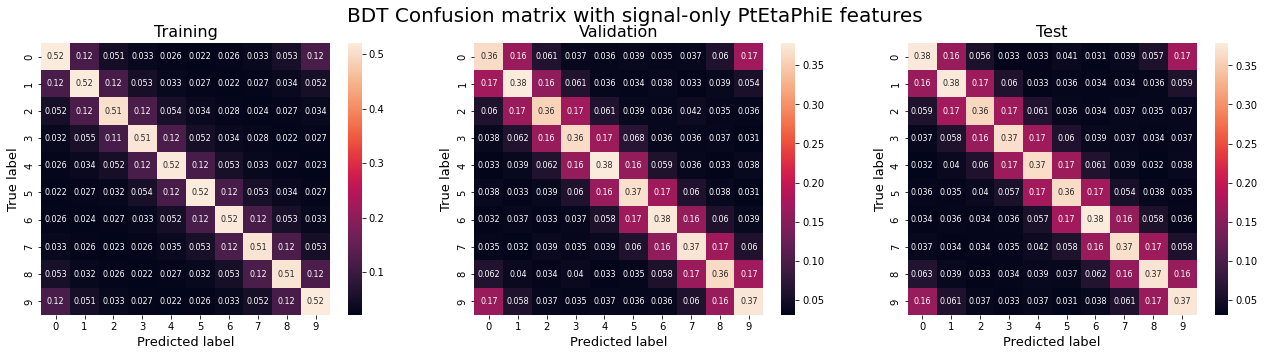

In [11]:
plot_confusion_matrix(normalize=True,
                          title='BDT Confusion matrix with signal-only PtEtaPhiE features')

In [ ]:
# Interaction_values = model.get_feature_importance(Pool(x_train, y_train), type='Interaction')
# diagonal_vector=np.zeros((x_train.shape[1],3))
# diagonal_vector[:,0]=np.arange(x_train.shape[1])
# diagonal_vector[:,1]=np.arange(x_train.shape[1])
# Interaction_value=np.concatenate([Interaction_values,diagonal_vector],axis=0)
# Interaction_matrix=scipy.sparse.coo_matrix((Interaction_value[:,2],(Interaction_value[:,0].astype(int),Interaction_value[:,1].astype(int)))).toarray()
# Interaction_matrix=Interaction_matrix+Interaction_matrix.T
# plt.subplots(dpi=150)
# sns.heatmap(Interaction_matrix,xticklabels=features_names,yticklabels=features_names)

In [12]:
feat_importance = pd.DataFrame(model.feature_importances_).T

In [13]:
feat_importance.columns = features_names
feat_importance

,n_pT,n_eta,n_phi,n_E,pi-_pT,pi-_eta,pi-_phi,pi-_E,pi0_1_pT,pi0_1_eta,...,an_phi,an_E,pi+_pT,pi+_eta,pi+_phi,pi+_E,pi0_2_pT,pi0_2_eta,pi0_2_phi,pi0_2_E
0,0.947302,1.373206,10.50524,0.858167,2.275484,2.484139,10.941537,3.501651,0.355192,2.52704,...,10.60717,0.824584,2.453703,2.580768,10.914666,3.435518,0.213604,2.379134,10.715538,3.555203


/tmp/ipykernel_18352/11480423.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(),size = 7)


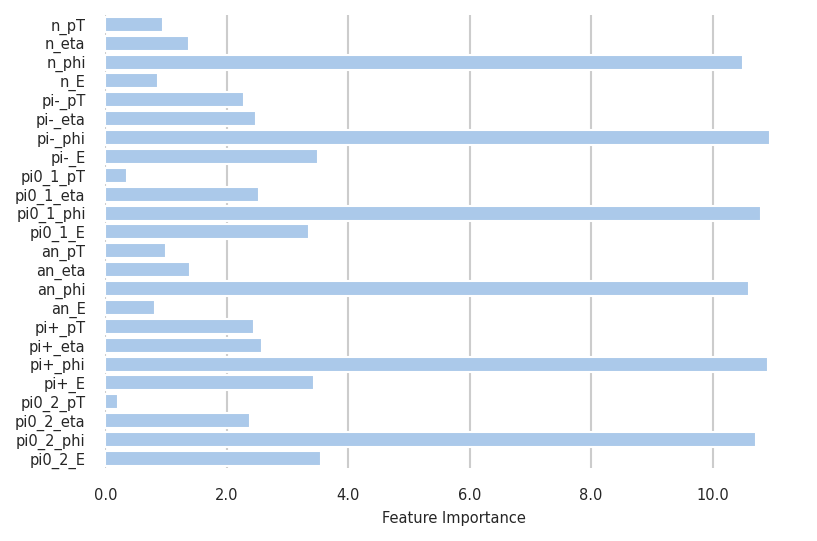

In [14]:
sns.set_theme(style="whitegrid")
fig,ax=plt.subplots(dpi=150)

sns.set_color_codes("pastel")
sns.barplot(data=feat_importance, color="b", orient="h")
ax.set_yticklabels(feat_importance, size = 7)
ax.set_xticklabels(ax.get_xticks(),size = 7)
ax.set_xlabel("Feature Importance", size = 7)
# ax.set_title("")
sns.despine(left=True, bottom=True)